<a href="https://colab.research.google.com/github/MatthewFried/Udemy/blob/master/Day2_Example3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day2: Cleaning “Messy” Data

#### Wine is an alcoholic beverage made with the fermented juice of grapes. Technically, any fruit is capable of being used for wine<br/> (i.e., apples, cranberries, plums, etc.) 


When working with data there is usually the need to improve its quality, hence the quality of the information we are able to extract from our data will also improve. <br> <br>
__Goal:__ explore and “clean” a data set that suffers from a variety of data integrity + usability issues for purposes of using it within a machine learning algorithm.

***

## Exploratory Data Analysis

The data set I will be using is comprised of information on more than 12,700 wines, with many of the attributes being related to the chemical composition of them. An overview of the data attributes is provided below, where I also included some of the measurement units based on research about the values of these attributes.

| Data Set Attribute  | Description 
|:--------------------|:----------------------------------------------------------------------------- |
|__INDEX__             |Unique ID                                                                   | 
|__TARGET__            |Response Variable (indicates # of cases of wine sold)                       |
|__FixedAcidity__      |FixedAcidity of the wine (g/L)                                              |
|__VolatileAcidity__   |Volatile acid content of the wine (g/L)                                     |
|__CitricAcid__        |Citric Acid content of the wine (g/L)                                       |
|__ResidualSugar__     |Residual sugar content of the wine (g/L)                                    |
|__Chlorides__         |Chloride content of the wine                                                |
|__FreeSulfurDioxide__ |Sulfur Dioxide content of the wine (mg/L)                                   |
|__TotalSulfurDioxide__|Total sulfur dioxide content of the wine (mg/L)                             |
|__Density__           |Density of the wine (g/mL)                                                  |
|__pH__                |pH of the wine                                                              |
|__Sulphates__         |Sulfate content of the wine                                                 |
|__Alcohol__           |Alcohol Content                                                             |
|__LabelAppeal__       |Subjective marketing score that indicates the appeal of the design of the label on the bottle                                                                                 |
|__AcidIndex__         |Measures total acidity of wine via a weighted average                       |
|__STARS__             |Wine rating as determined by experts (4 = excellent; 1 = Poor)              |

In [ ]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix
import missingno as msno

# styling matplotlib graphs
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (8,4)

In [ ]:
#loading the data from my own github repo
df=pd.read_csv("https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv")

#sanity check
df.head()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
0,1,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,2.0
1,2,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,3.0
2,4,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,3.0
3,5,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,1.0
4,6,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,2.0


In [ ]:
#checking dataset shape
df.shape

(12795, 16)

In [ ]:
#checking df info, including column data types, and if any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

We can see that INDEX, TARGET, LabelAppeal and AcidIndex are integer, whereas the rest of the attributes have floating point values. It also shows the number of non-null values in each field.

In [ ]:
#getting exact number of null values in each column
null_count=df.isnull().sum()
null_count

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

In [ ]:
# get percent of missing data
missing = df.isnull().mean() * 100
missing.sort_values(inplace=True,ascending=False)
missing

STARS                 26.252442
Sulphates              9.456819
TotalSulfurDioxide     5.330207
Alcohol                5.103556
FreeSulfurDioxide      5.056663
Chlorides              4.986323
ResidualSugar          4.814381
pH                     3.087143
AcidIndex              0.000000
LabelAppeal            0.000000
Density                0.000000
CitricAcid             0.000000
VolatileAcidity        0.000000
FixedAcidity           0.000000
TARGET                 0.000000
INDEX                  0.000000
dtype: float64

There are 8 columns that contain null values, with STARS as the attribute with the highest number of missing data with 3359, that corresponds to over 26% of the records.

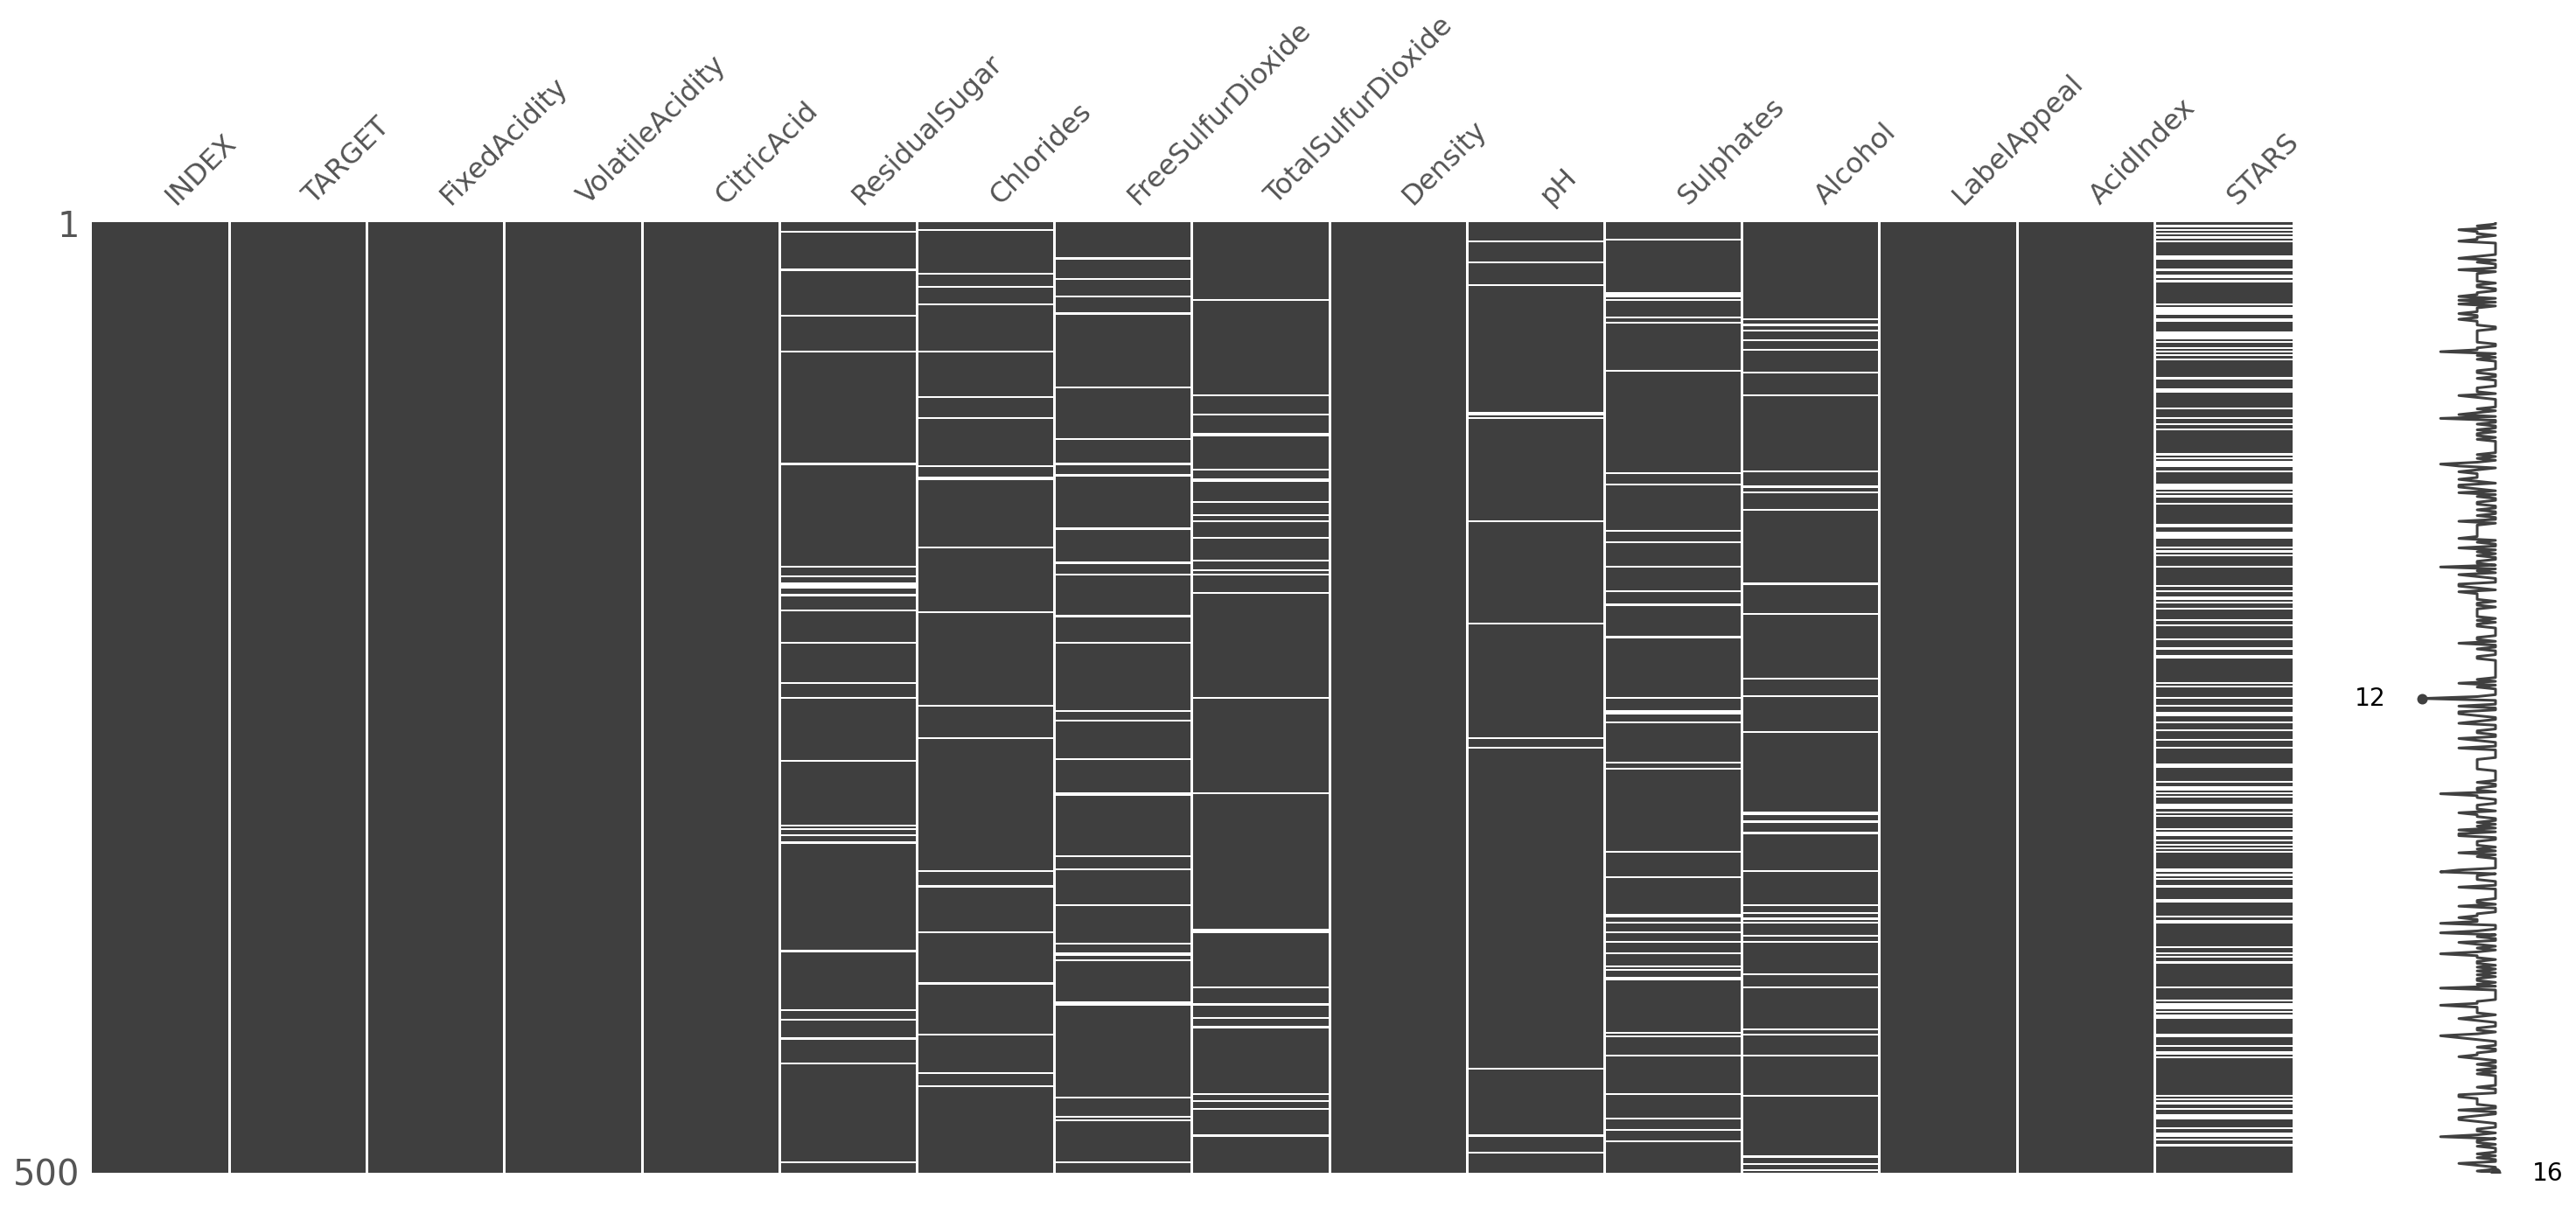

In [ ]:
#create a copy of the dataframe
orig_df = df

#visualizing patterns in the missing data 500 random records
ax = msno.matrix(orig_df.sample(500))

The graph shows that there are no big areas of contiguous missing data, suggesting that it is random.

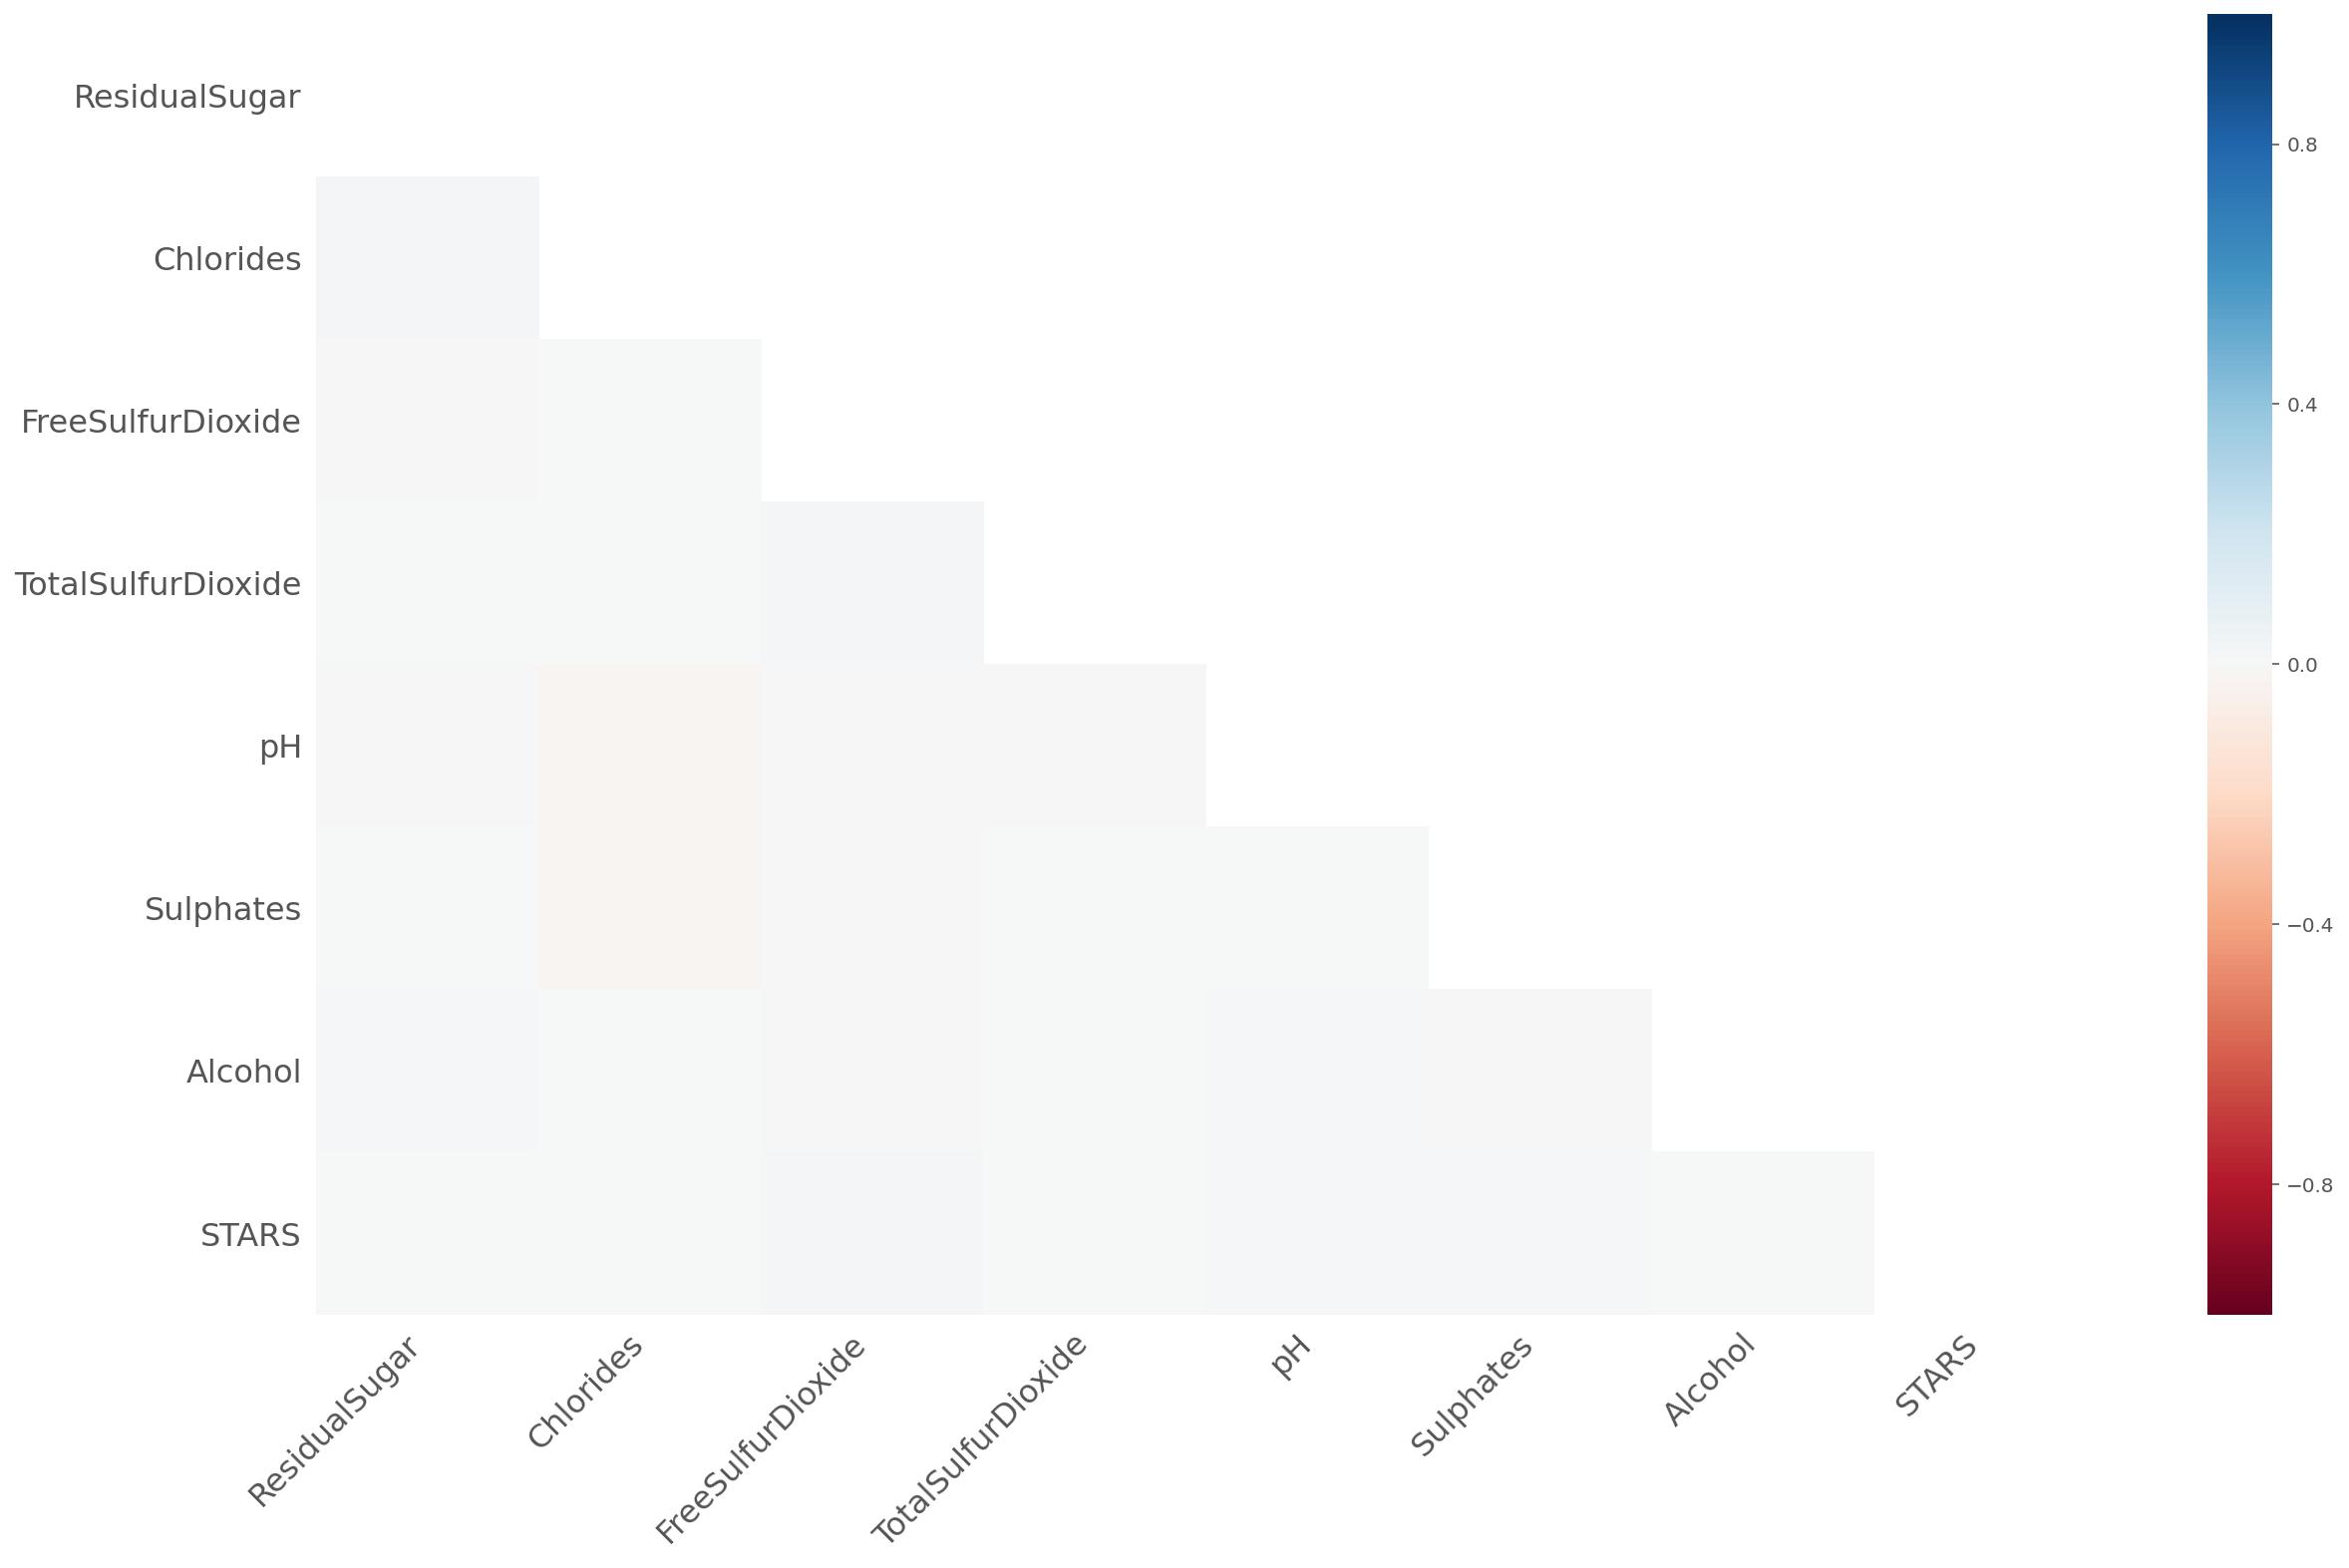

In [ ]:
# Visualize the correlation between the number of 
# missing values in different columns as a heatmap 
msno.heatmap(df);

We can see that there is almost no correlation between missing values 

In [ ]:
# get count of negative values across each column
negatives_count=df.iloc[:,1:].where(df.iloc[:,1:]<0).count()
negatives_count

TARGET                   0
FixedAcidity          1621
VolatileAcidity       2827
CitricAcid            2966
ResidualSugar         3136
Chlorides             3197
FreeSulfurDioxide     3036
TotalSulfurDioxide    2504
Density                  0
pH                       0
Sulphates             2361
Alcohol                118
LabelAppeal           3640
AcidIndex                0
STARS                    0
dtype: int64

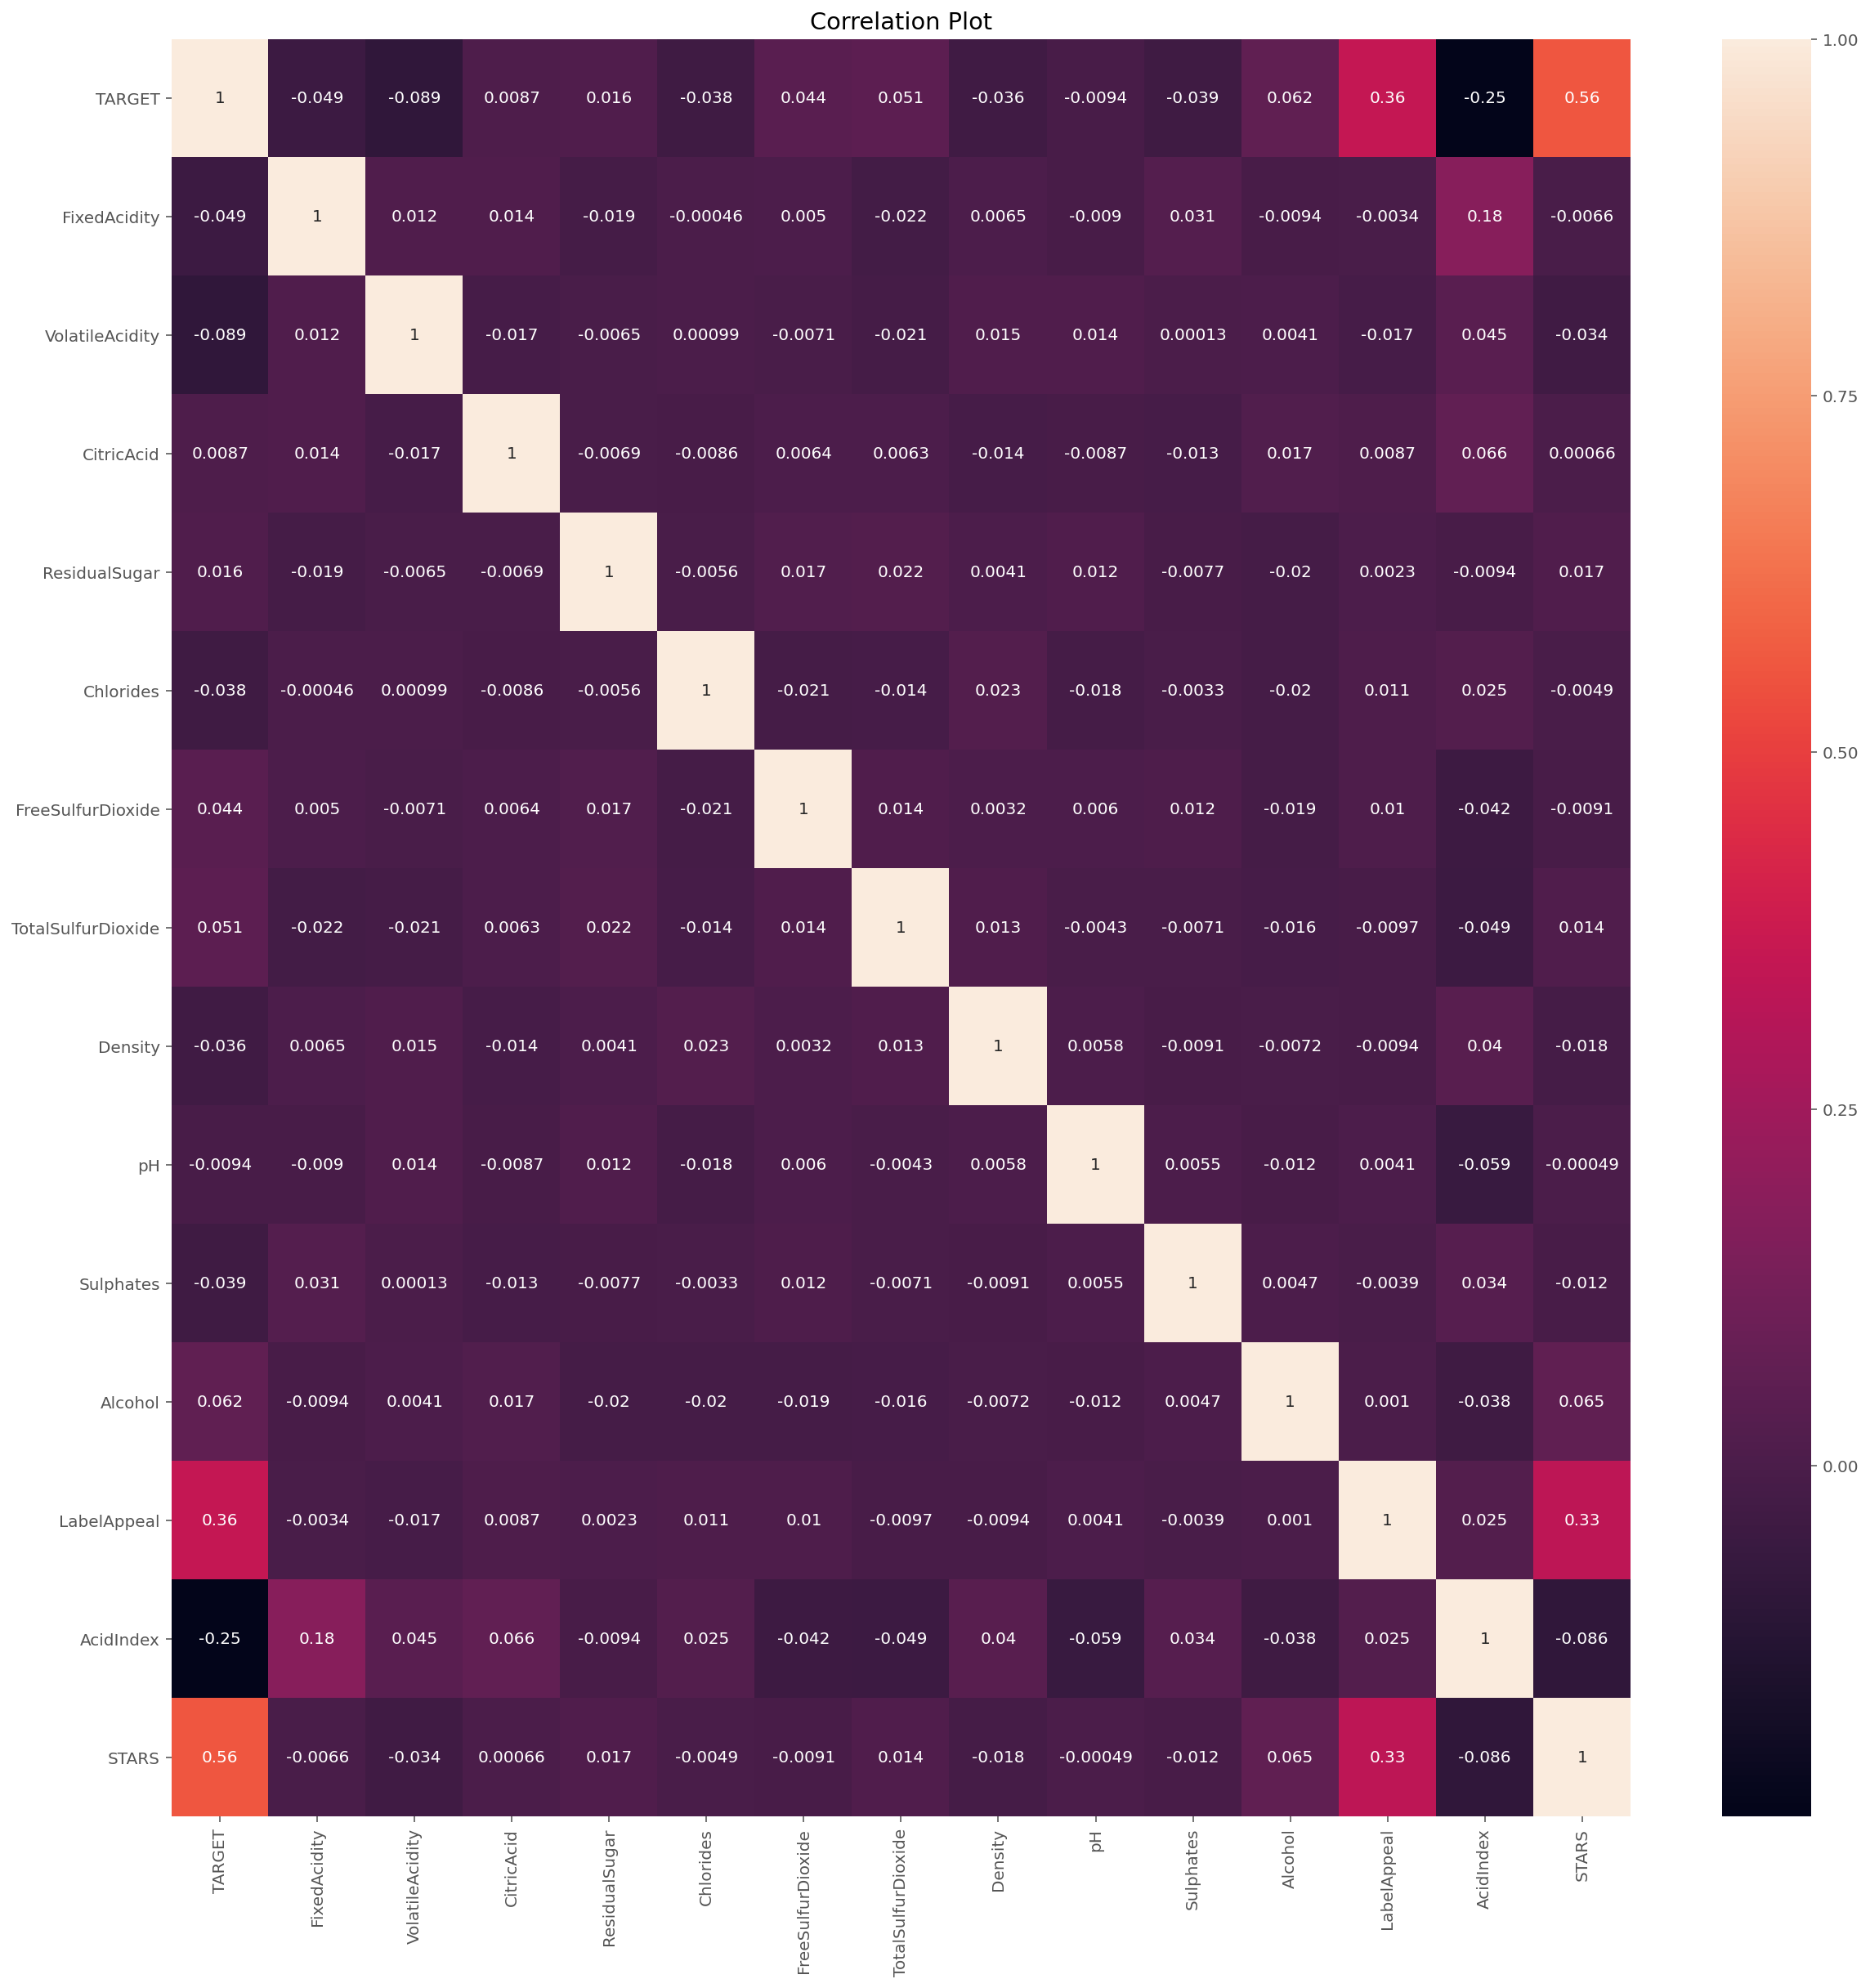

In [ ]:
# initial correlation
cor = df.iloc[:,1:].corr()
plt.figure(figsize=(20,20))
plt.title("Correlation Plot")
sns.heatmap(cor,annot=True)
plt.show()

Initially, before making any data cleaning, we can see that STARS and LabelAppeal seem to have a positive association with the TARGET, however these are categorical variables as will review later in the analysis, so it can't be directly interepreted as a possitive association.

In [ ]:
#correlation with only positive values
df.iloc[:,1:].where(df.iloc[:,1:]>=0).corr()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
TARGET,1.000000,-0.058918,-0.103090,0.019015,0.014160,-0.052800,0.047547,0.055484,-0.035518,-0.009445,-0.042531,0.065759,0.227353,-0.246049,0.558794
FixedAcidity,-0.058918,1.000000,0.006006,0.008846,-0.014012,-0.000611,-0.007070,-0.022086,0.005168,0.004921,0.032043,-0.005847,0.004044,0.193388,-0.025931
VolatileAcidity,-0.103090,0.006006,1.000000,-0.004005,0.008456,0.004167,-0.015759,-0.049595,0.000868,0.018652,0.008558,0.005018,-0.014975,0.055934,-0.042810
CitricAcid,0.019015,0.008846,-0.004005,1.000000,-0.016150,-0.004954,0.006028,0.020059,-0.015084,-0.005727,0.017214,0.003453,0.020074,0.068501,0.003561
ResidualSugar,0.014160,-0.014012,0.008456,-0.016150,1.000000,-0.019175,0.004078,0.037447,0.005136,0.011344,-0.007874,-0.022966,-0.003571,-0.021055,0.016184
Chlorides,-0.052800,-0.000611,0.004167,-0.004954,-0.019175,1.000000,-0.008532,-0.022753,0.021212,-0.000102,0.023453,-0.010209,-0.002799,0.044395,-0.001173
FreeSulfurDioxide,0.047547,-0.007070,-0.015759,0.006028,0.004078,-0.008532,1.000000,0.030824,0.004469,0.001167,0.001715,-0.019045,0.009271,-0.050122,-0.002211
TotalSulfurDioxide,0.055484,-0.022086,-0.049595,0.020059,0.037447,-0.022753,0.030824,1.000000,0.017765,0.007413,-0.018980,-0.040031,-0.004171,-0.058606,0.002739
Density,-0.035518,0.005168,0.000868,-0.015084,0.005136,0.021212,0.004469,0.017765,1.000000,0.005768,0.012659,-0.012027,0.006123,0.040413,-0.018284
pH,-0.009445,0.004921,0.018652,-0.005727,0.011344,-0.000102,0.001167,0.007413,0.005768,1.000000,0.018738,-0.007903,0.002687,-0.058676,-0.000488


This initial correlation between the explanatory variables with the response (TARGET), which excludes NA/null values, shows that the STARS variable has the largest number of null values and also the highest correlation with the response. This indicate that we should try to solve the null values issues within this variable, and one way could be to create an indicator feature called "no_stars".

In [ ]:
# descriptive stats
df.describe()

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS
count,12795.000000,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,8069.980305,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,4656.905107,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,1.000000,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,4037.500000,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,8110.000000,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,12106.500000,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,16129.000000,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


According to this initial descriptive statistics we can see that there are several columns that contain negative numbers, like FixedAcidity, VolatileAcidity, ResidualSugar among others, and this is not a very good signal, since these are not attributes that would make sense to have values below zero. We will take a look closer at each attribute distribution to understand them better.

### Analyzing each attribute individually

In [ ]:
# INDEX
# chequing if there are duplicates, and there aren't
df[df.INDEX.duplicated()]

,INDEX,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,STARS


This attribute does not provide any meaninful information to a machine learning model, hance it does not require any further analysis.

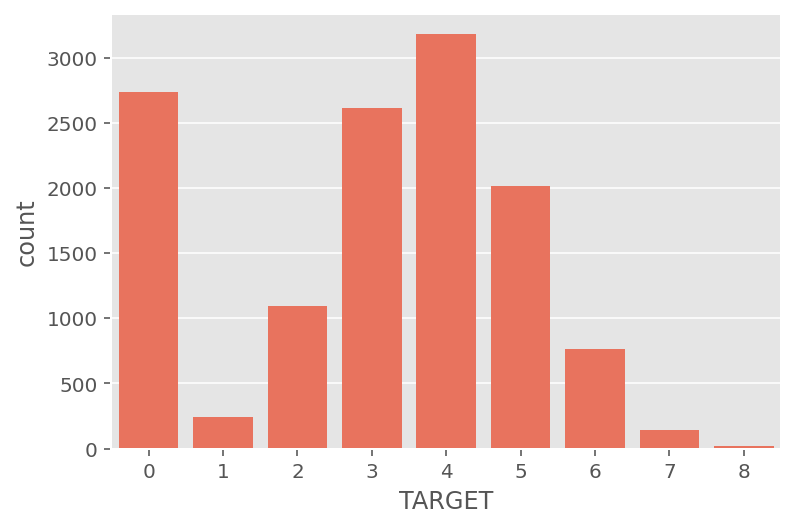

In [ ]:
#LabelAppeal
sns.countplot(x="TARGET",data=df, color='tomato');

We can see that there are more than 2500 records with a target of 0,3 and 4 whereas very few wines with a target of 8. It is interesting to see the high number of the wines that have a TARGET of zero, meaning that not even a single unit was sold.

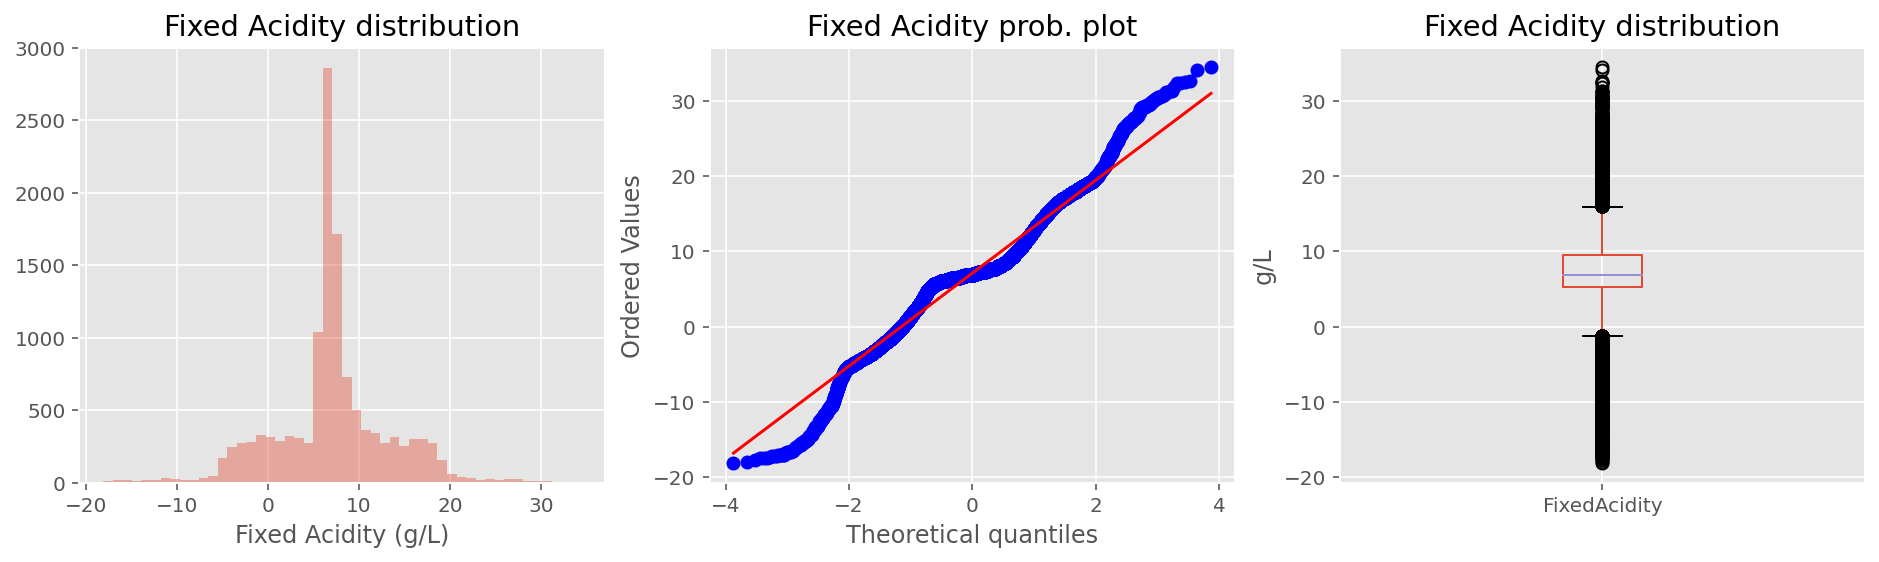

In [ ]:
#FixedAcidity, there are no null values
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
plt.xlabel('g/L')
sns.distplot(df["FixedAcidity"], kde=False);
plt.title("Fixed Acidity distribution");
plt.xlabel('Fixed Acidity (g/L)')

plt.subplot(1, 3, 2)
probplot(df["FixedAcidity"], plot = plt);
plt.title("Fixed Acidity prob. plot");

plt.subplot(1, 3, 3)
plt.ylabel('g/L')
df.boxplot(column='FixedAcidity');
plt.title("Fixed Acidity distribution");

In [ ]:
df[df.FixedAcidity>30].TARGET.value_counts()

4    8
0    5
3    4
5    3
2    1
Name: TARGET, dtype: int64

We can see that the mean Fixed Acidity within the records is around 7 (g/L) and it could be considered a nearly normal distribution. Doing some research it seems that the predominant fixed acids found in wines are: tartaric, malic, citric, and succinic.  Their respective levels found in wine can vary greatly but in general one would expect to see 1,000 to 4,000 mg/L tartaric acid, 0 to 8,000 mg/L malic acid, 0 to 500 mg/L citric acid, and 500 to 2,000 mg/L succinic acid. 

Given the nature of this data we conclude that we can't have negative values, indicating some error at the time the data was created/collected. This feature will need to be transformed to only have positive values.

https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity#:~:text=The%20predominant%20fixed%20acids%20found,2%2C000%20mg%2FL%20succinic%20acid.

The boxplot show that the upper whisker extends up to around 17 which seems to be tentative limit value for this attribute. All values higher than that can be considered as outliers.

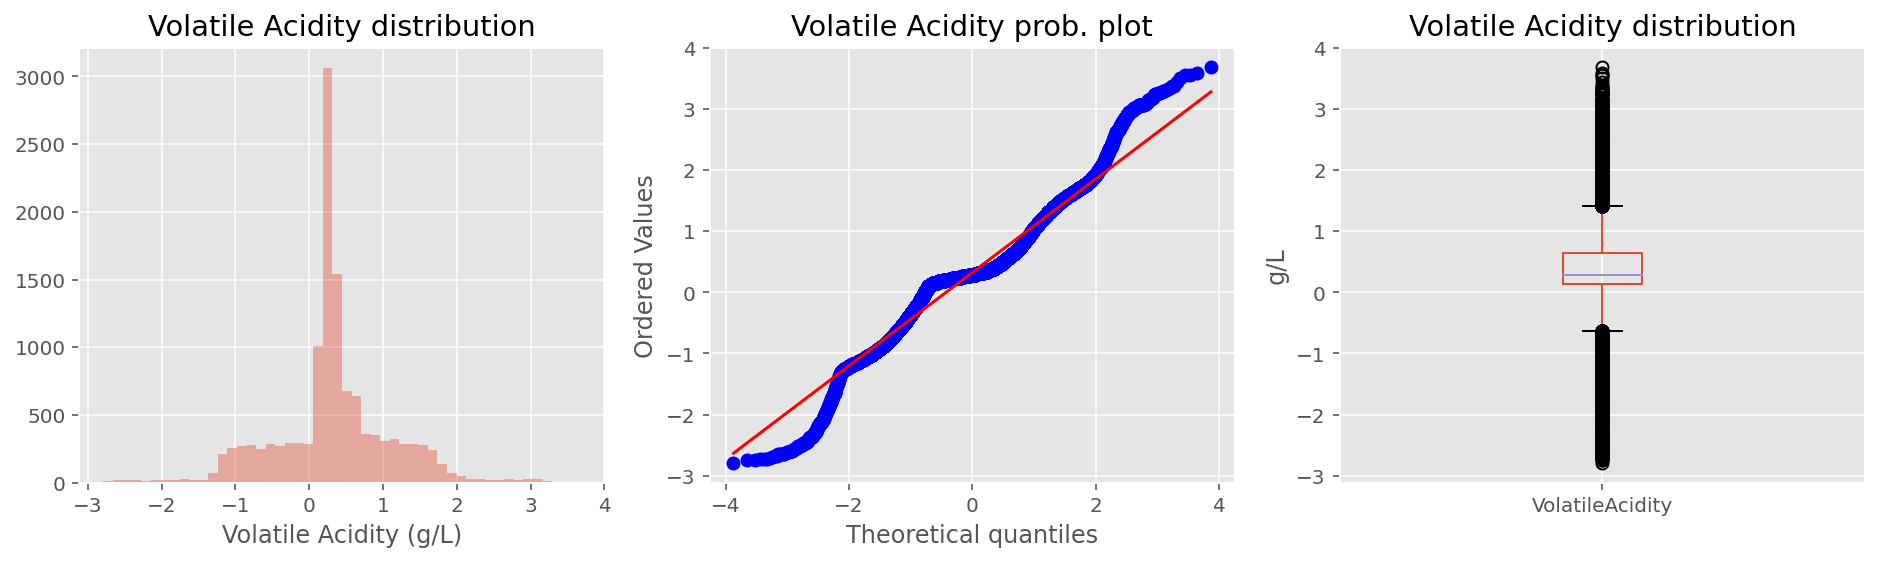

In [ ]:
#VolatileAcidity, there are no null values
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.distplot(df["VolatileAcidity"], kde=False);
plt.title("Volatile Acidity distribution");
plt.xlabel('Volatile Acidity (g/L)')

plt.subplot(1, 3, 2)
probplot(df["VolatileAcidity"], plot = plt);
plt.title("Volatile Acidity prob. plot");

plt.subplot(1, 3, 3)
plt.ylabel('g/L')
df.boxplot(column='VolatileAcidity');
plt.title("Volatile Acidity distribution");

Here, there is a similar scenario as the previous one. Given the nature of this data we can't have negative values, indicating some error at the time the data was created/collected. This feature will need to be transformed to only have positive values. According to the article below, in the US there are limits for the amount of Volatile Acidity, which is for Red Wine 1.2 g/L, and for White Wine 1.1 g/L

https://waterhouse.ucdavis.edu/whats-in-wine/volatile-acidity#:~:text=The%20average%20level%20of%20acetic,undetectable%20up%20to%203g%2FL.&text=The%20aroma%20threshold%20for%20acetic,on%20the%20variety%20and%20style.

The boxplot show that the upper whisker extends up to around 1.5 which seems to be tentative limit value for this attribute. All values higher than that can be considered as outliers.

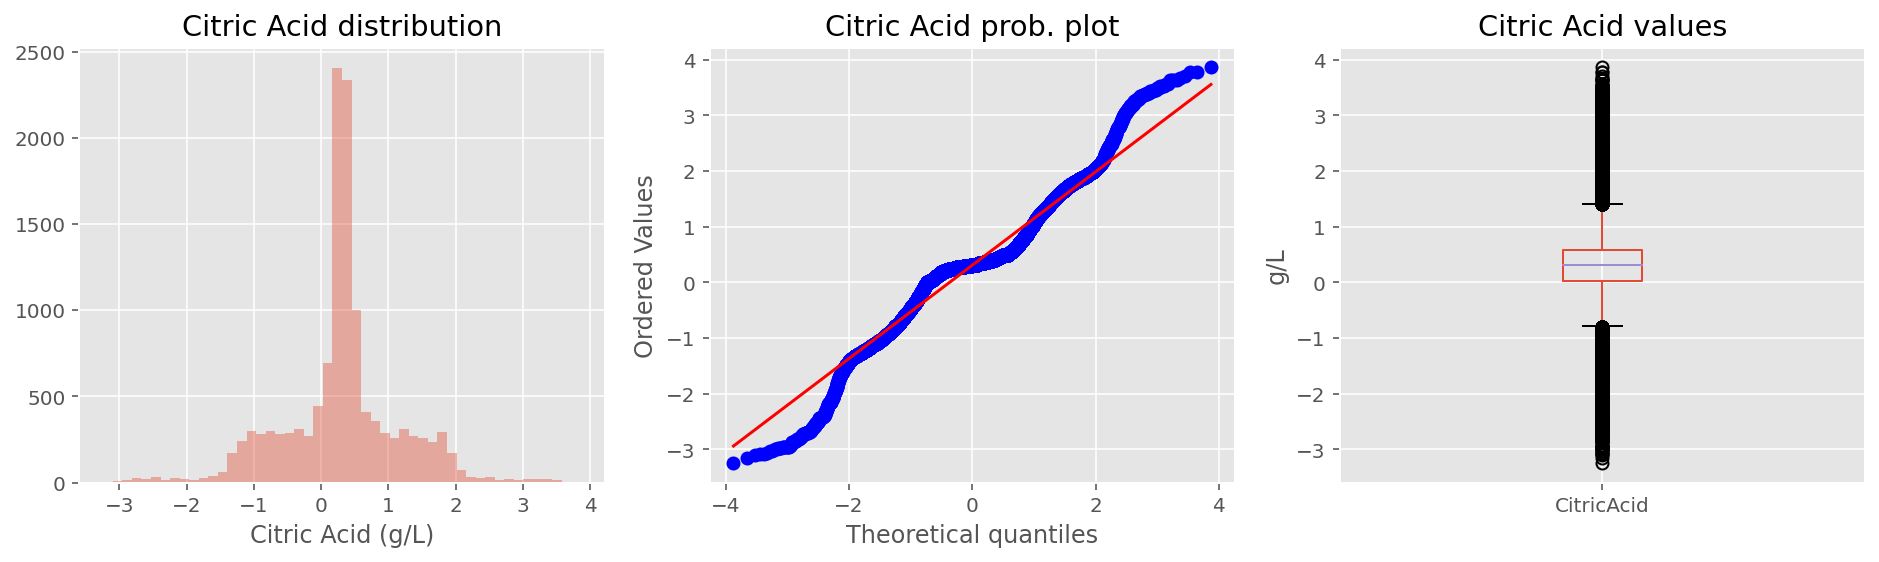

In [ ]:
#CitricAcid, no null values
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.distplot(df["CitricAcid"], kde=False);
plt.title("Citric Acid distribution");
plt.xlabel('Citric Acid (g/L)')

plt.subplot(1, 3, 2)
probplot(df["CitricAcid"], plot = plt);
plt.title("Citric Acid prob. plot");

plt.subplot(1, 3, 3)
plt.ylabel('g/L')
df.boxplot(column='CitricAcid');
plt.title("Citric Acid values");

Again there is a similar scenario as the previous one. Given the nature of this data we can't have negative values, indicating some error at the time the data was created/collected. This feature will need to be transformed, so that it only has positive values. <br>
According to the article below we can consider that above 1 g/L can be considered that it has reached the Maximum Acceptable Limits according to the International Code of Oenological Practices.
http://www.oiv.int/public/medias/3741/e-code-annex-maximum-acceptable-limits.pdf

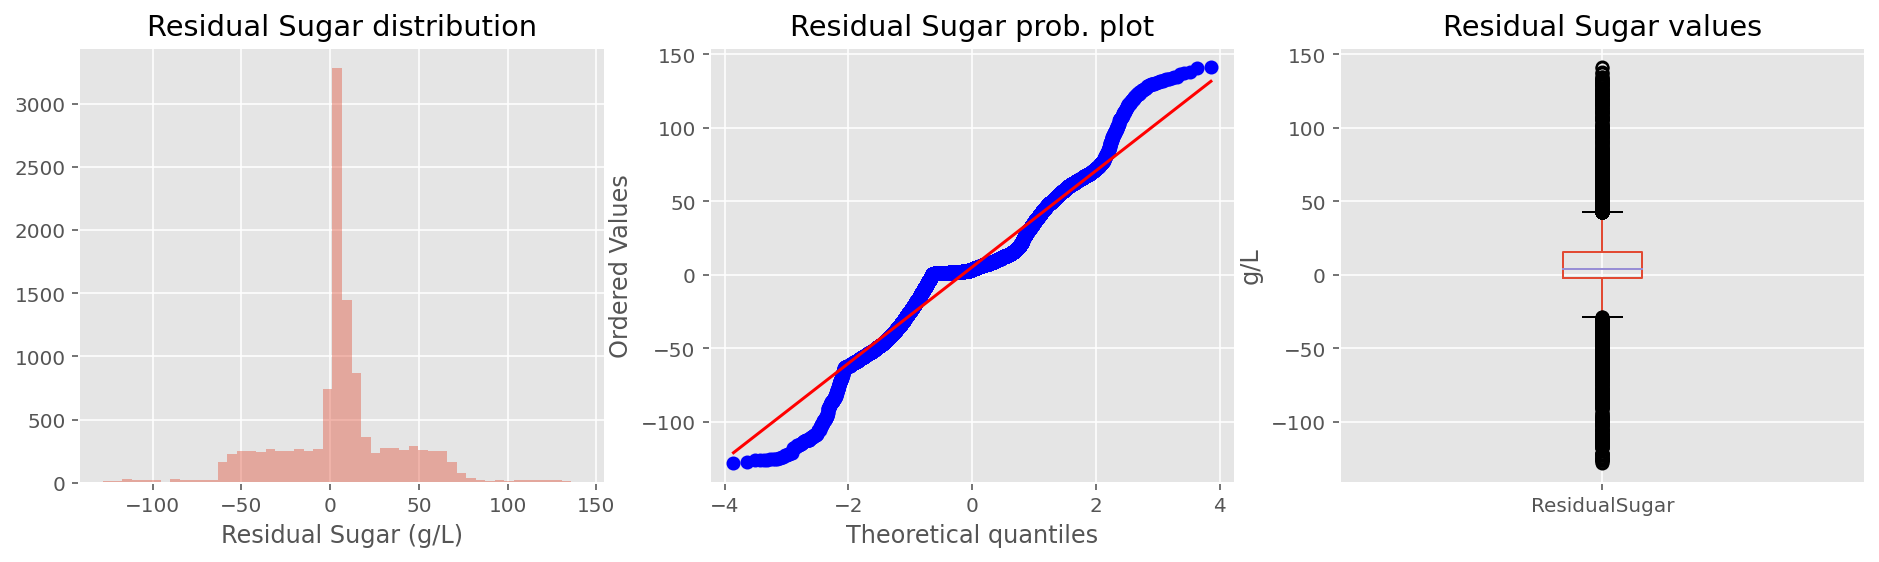

In [ ]:
#ResidualSugar, getting the non null values for ResidualSugar column, (4.8% of the values)
sugar_notna=df[df['ResidualSugar'].notnull()]['ResidualSugar']

#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.distplot(sugar_notna, kde=False);
plt.title("Residual Sugar distribution");
plt.xlabel('Residual Sugar (g/L)')

plt.subplot(1, 3, 2)
probplot(sugar_notna, plot = plt);
plt.title("Residual Sugar prob. plot");

plt.subplot(1, 3, 3)
plt.ylabel('g/L')
df.boxplot(column='ResidualSugar');
plt.title("Residual Sugar values");

Given the nature of this data we can't have negative values, indicating some error at the time the data was created/collected. This feature will need to be transformed, so that it only has positive values.

https://winefolly.com/deep-dive/what-is-residual-sugar-in-wine/#:~:text=Residual%20Sugar%20(or%20RS)%20is,5%20ounces%20%2F%20150%20ml).

Residual Sugar (or RS) is from natural grape sugars leftover in a wine after the alcoholic fermentation finishes. Residual sugar levels vary in different types of wine. In fact, many grocery store wines labeled as “dry” contain about 10 g/L of residual sugar. Noticeably sweet wines start at around 35 grams per liter of residual sugar and then go up from there. <br>
__Wines range from 0–220 grams per liter sugar (g/L)__, depending on the style (https://winefolly.com/deep-dive/sugar-in-wine-chart/) so this means that values above 40 g/L does not mean that it is invalid data.

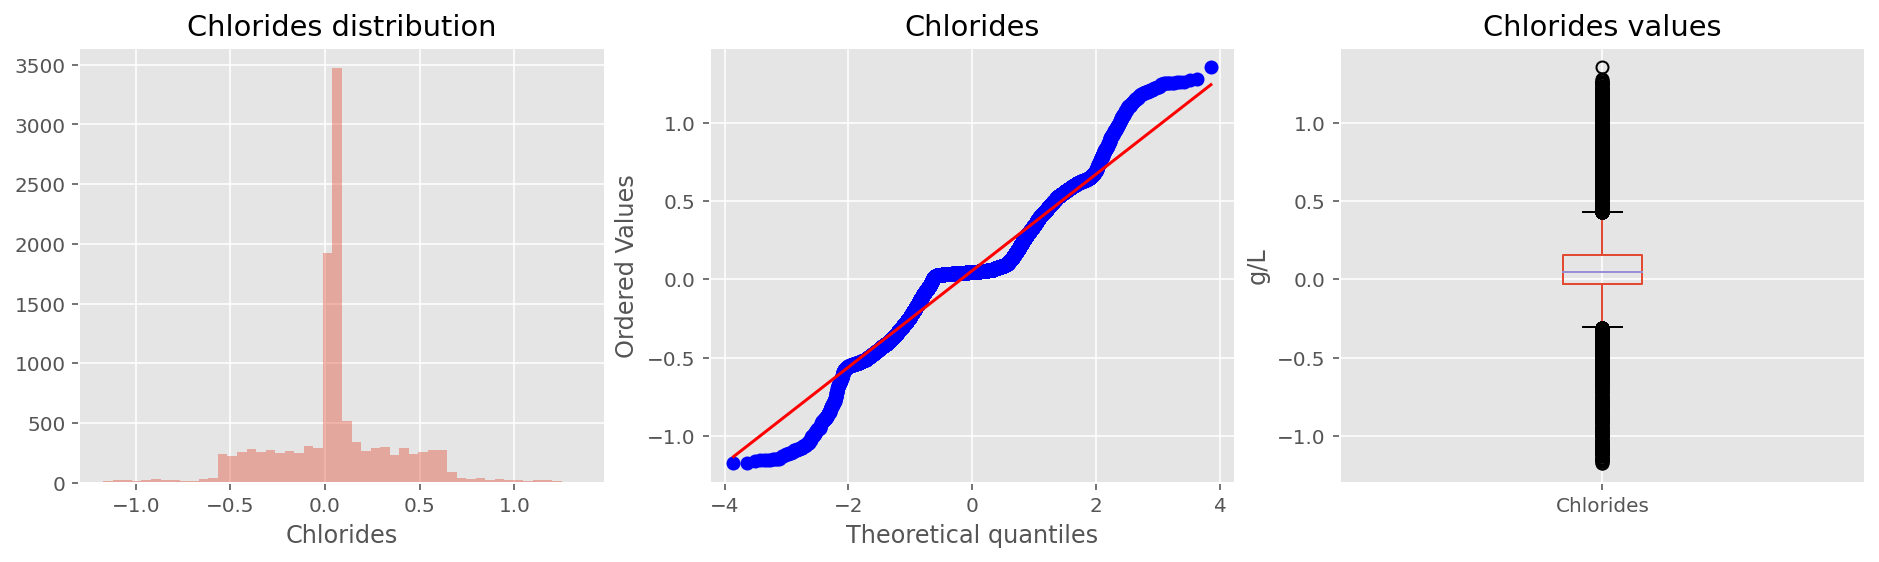

In [ ]:
#Chlorides, getting the non null values (4.98% of the values)
chlorides_notna=df[df['Chlorides'].notnull()]['Chlorides']

#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.distplot(chlorides_notna, kde=False);
plt.title("Chlorides distribution");
plt.xlabel('Chlorides')

plt.subplot(1, 3, 2)
probplot(chlorides_notna, plot = plt);
plt.title("Chlorides");

plt.subplot(1, 3, 3)
plt.ylabel('g/L')
df.boxplot(column='Chlorides');
plt.title("Chlorides values");

Given the nature of this data we can't have negative values, indicating some error at the time the data was created/collected. This feature will need to be transformed, so that it only has positive values. Maximum values are around 1g/L. <br> http://www.oiv.int/public/medias/3741/e-code-annex-maximum-acceptable-limits.pdf

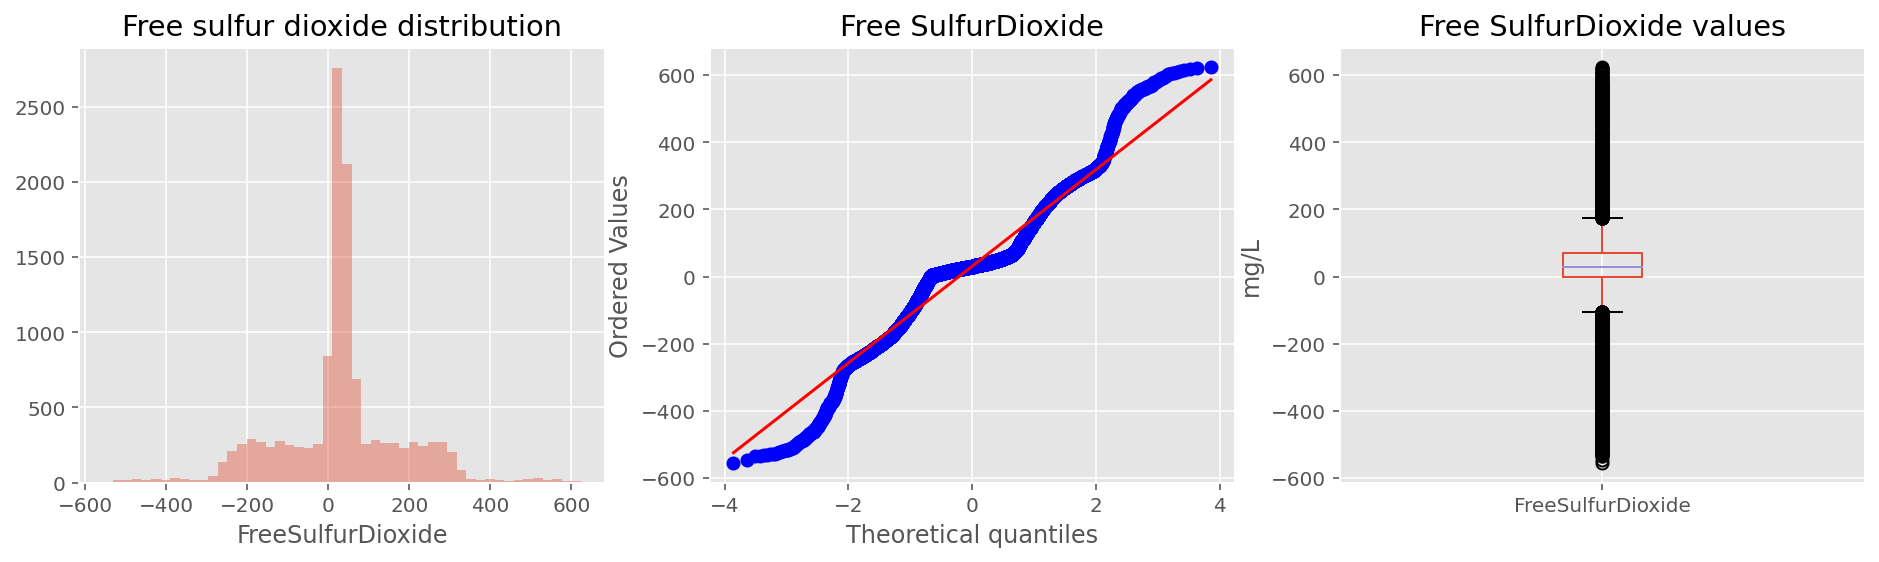

In [ ]:
#FreeSulfurDioxide, getting the non null values (5.05% of the values)
freeSulfurDioxide_notna=df[df['FreeSulfurDioxide'].notnull()]['FreeSulfurDioxide']

#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.distplot(freeSulfurDioxide_notna, kde=False);
plt.title("Free sulfur dioxide distribution");
plt.xlabel('FreeSulfurDioxide')

plt.subplot(1, 3, 2)
probplot(freeSulfurDioxide_notna, plot = plt);
plt.title("Free SulfurDioxide");

plt.subplot(1, 3, 3)
plt.ylabel('mg/L')
df.boxplot(column='FreeSulfurDioxide');
plt.title("Free SulfurDioxide values");

Given the nature of this data we can't have negative values, indicating some error at the time the data was created/collected. This feature will need to be transformed, so that it only has positive values. Above 200 mg/L might be considered outliers. <br>
https://www.campdenbri.co.uk/services/free-sulphur-dioxide.php#:~:text=Total%20and%20free%20sulphur%20dioxide,-Sulphur%20dioxide%20

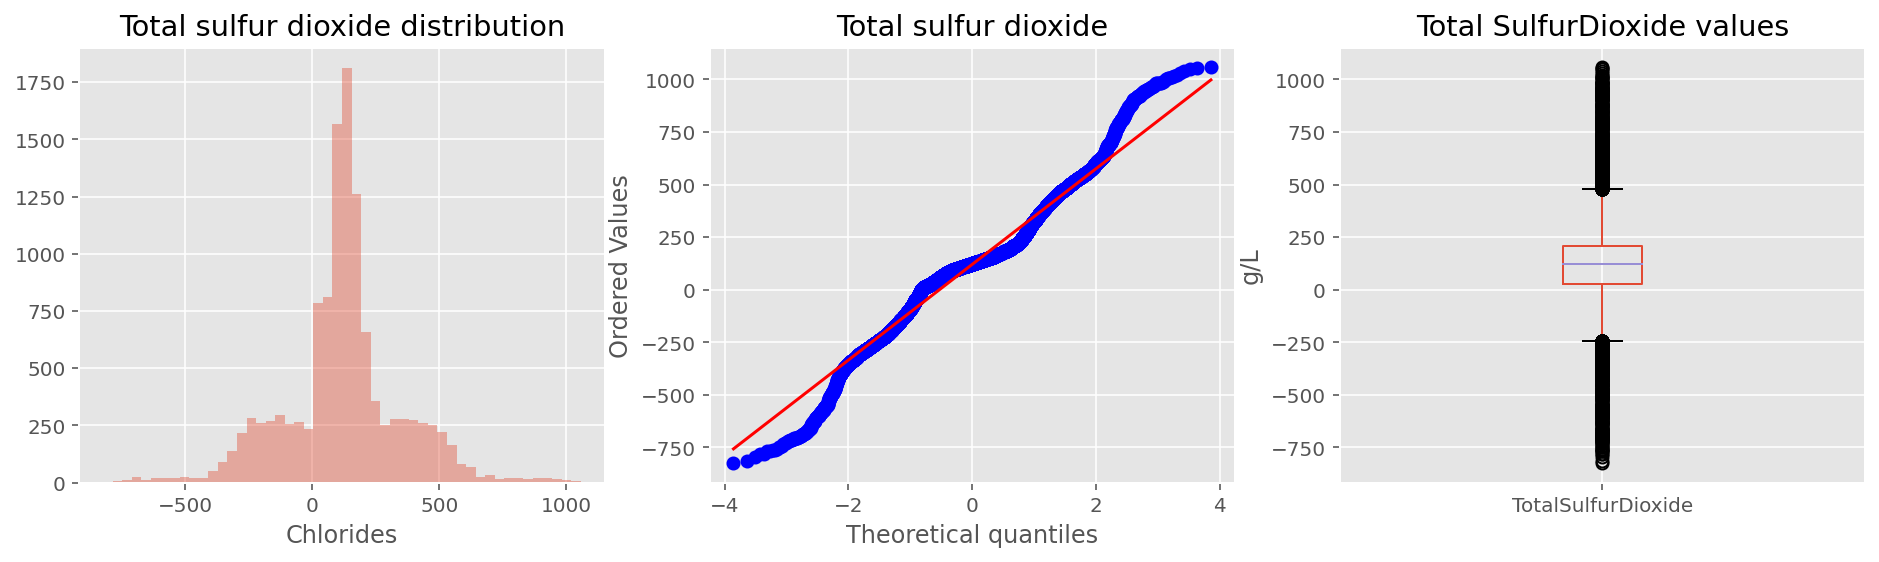

In [ ]:
#TotalSulfurDioxide, getting the non null values (5.3% of the values)
totalSulfurDioxide_notna=df[df['TotalSulfurDioxide'].notnull()]['TotalSulfurDioxide']

#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.distplot(totalSulfurDioxide_notna, kde=False);
plt.title("Total sulfur dioxide distribution");
plt.xlabel('Chlorides')

plt.subplot(1, 3, 2)
probplot(totalSulfurDioxide_notna, plot = plt);
plt.title("Total sulfur dioxide");

plt.subplot(1, 3, 3)
plt.ylabel('g/L')
df.boxplot(column='TotalSulfurDioxide');
plt.title("Total SulfurDioxide values");

The main preservative used in wine is sulphur dioxide, which you’ll see on the label as ‘preservative 220’, ‘minimal sulphur dioxide added’ or ‘contains sulphites’. Sulphur dioxide is added in the winemaking process to protect the wine from oxidation and bacterial spoilage (https://www.wineselectors.com.au/selector-magazine/wine/preserving-the-truth-on-sulphates-in-wine#:~:text=The%20main%20preservative%20used%20in,from%20oxidation%20and%20bacterial%20spoilage.)

Given the nature of this data we can't have negative values, indicating some error at the time the data was created/collected. This feature will need to be transformed, so that it only has positive values.

According to the limits in the link below, it seems reasonable to consider values above 500 mg/l as outliers.
http://www.oiv.int/public/medias/3741/e-code-annex-maximum-acceptable-limits.pdf

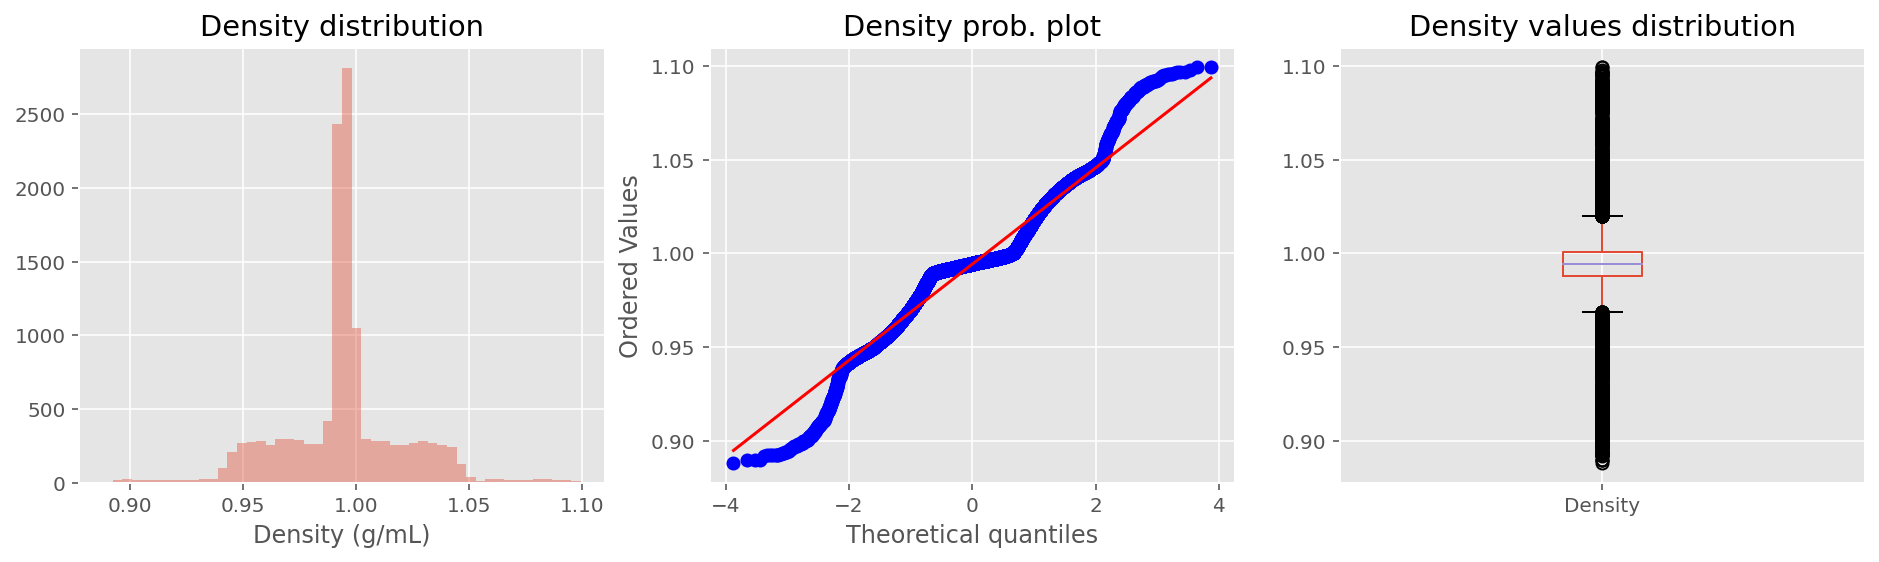

In [ ]:
#Density, there are no null values
#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
plt.xlabel('g/L')
sns.distplot(df["Density"], kde=False);
plt.title("Density distribution");
plt.xlabel('Density (g/mL)')

plt.subplot(1, 3, 2)
probplot(df["Density"], plot = plt);
plt.title("Density prob. plot");

plt.subplot(1, 3, 3)
#plt.ylabel('g/mL')
df.boxplot(column='Density');
plt.title("Density values distribution");

asdad

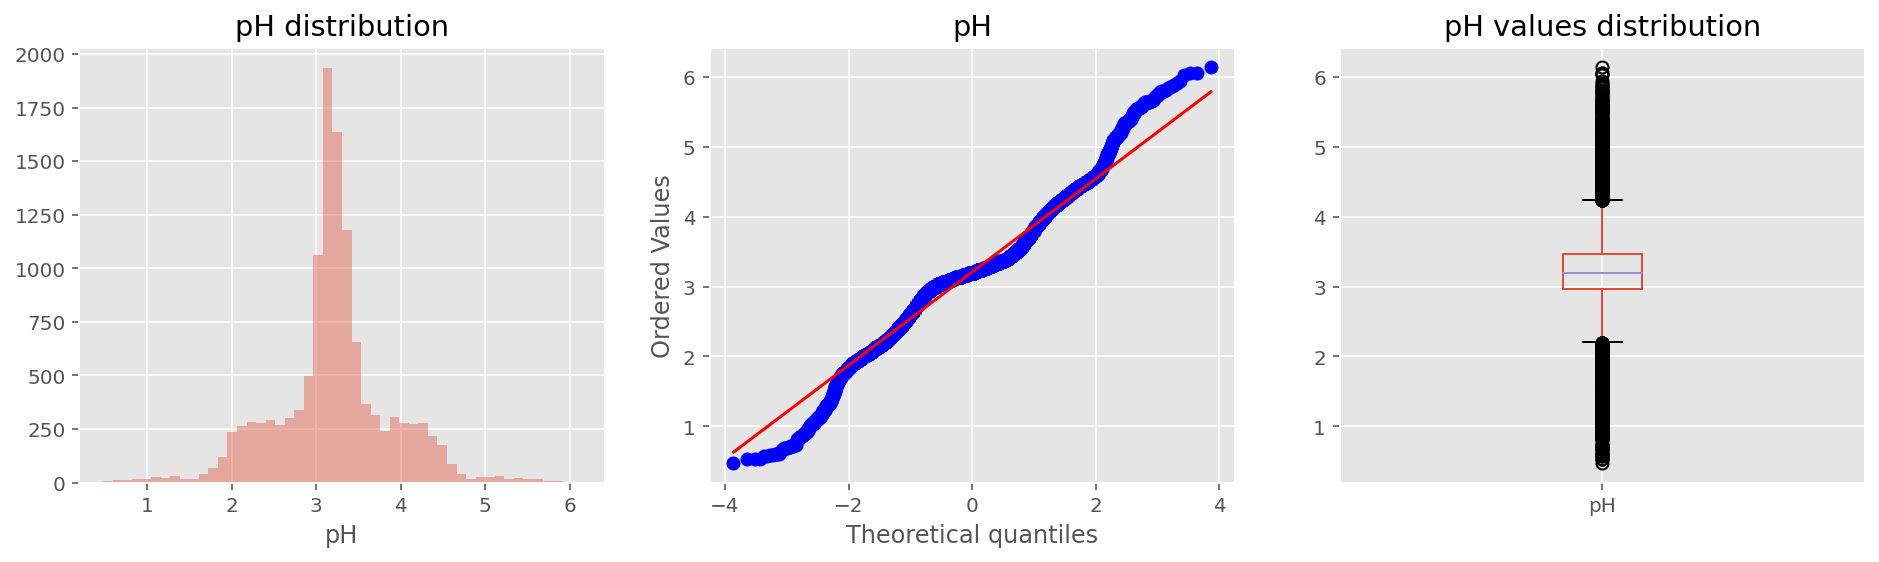

In [ ]:
#pH, getting the non null values (3.08% of the values)
pH_notna=df[df['pH'].notnull()]['pH']

#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.distplot(pH_notna, kde=False);
plt.title("pH distribution");
plt.xlabel('pH')

plt.subplot(1, 3, 2)
probplot(pH_notna, plot = plt);
plt.title("pH");

plt.subplot(1, 3, 3)
df.boxplot(column='pH');
plt.title("pH values distribution");

According to the url below all wines lie on the acidic side of the pH spectrum, and most range from 2.5 to about 4.5 pH (7 is neutral). Meaning the whisker plots in the boxplot show a reasonable assumption of valid values, which would mean to remove the outliers.
https://winefolly.com/deep-dive/understanding-acidity-in-wine/

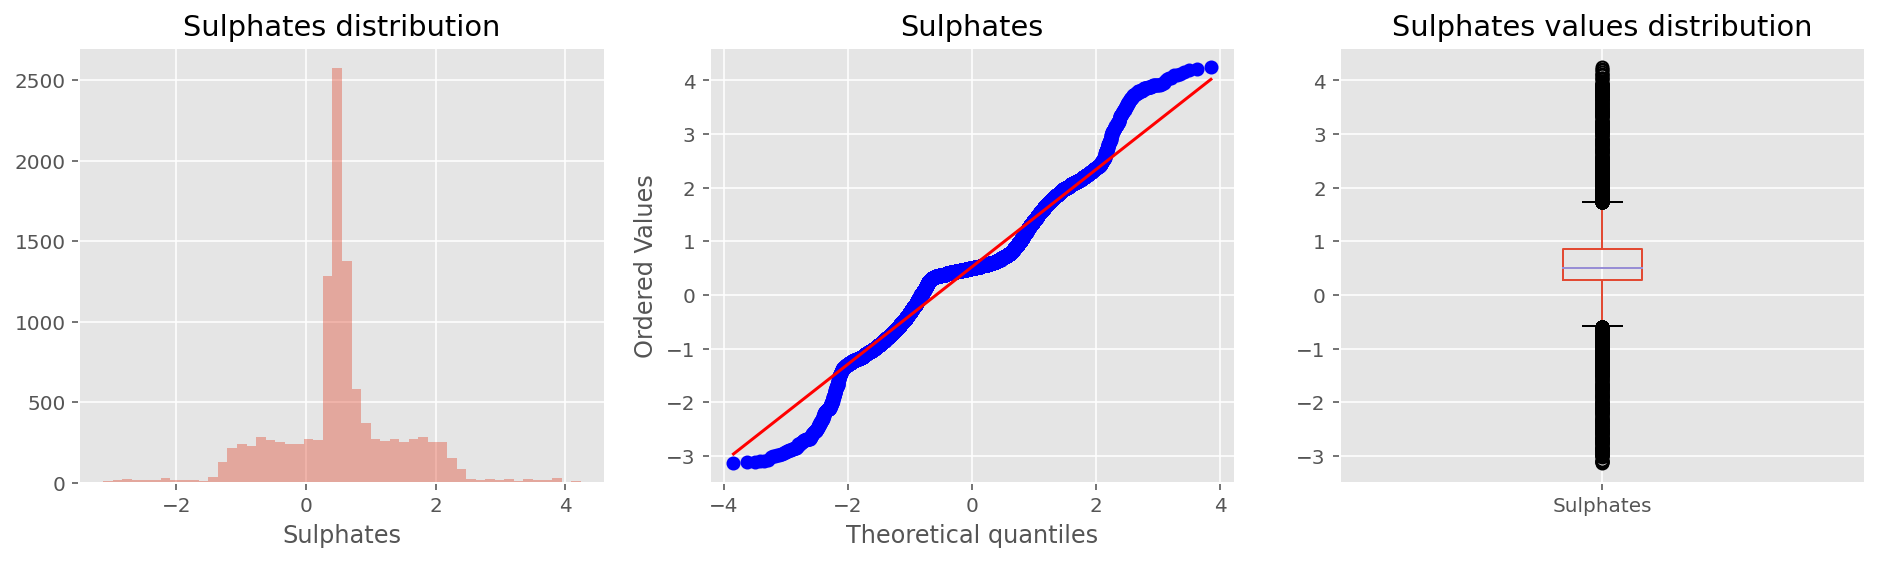

In [ ]:
#Sulphates, getting the non null values (9.45% of the values)
sulphates_notna=df[df['Sulphates'].notnull()]['Sulphates']

#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.distplot(sulphates_notna, kde=False);
plt.title("Sulphates distribution");
plt.xlabel('Sulphates')

plt.subplot(1, 3, 2)
probplot(sulphates_notna, plot = plt);
plt.title("Sulphates");

plt.subplot(1, 3, 3)
df.boxplot(column='Sulphates');
plt.title("Sulphates values distribution");

asdad

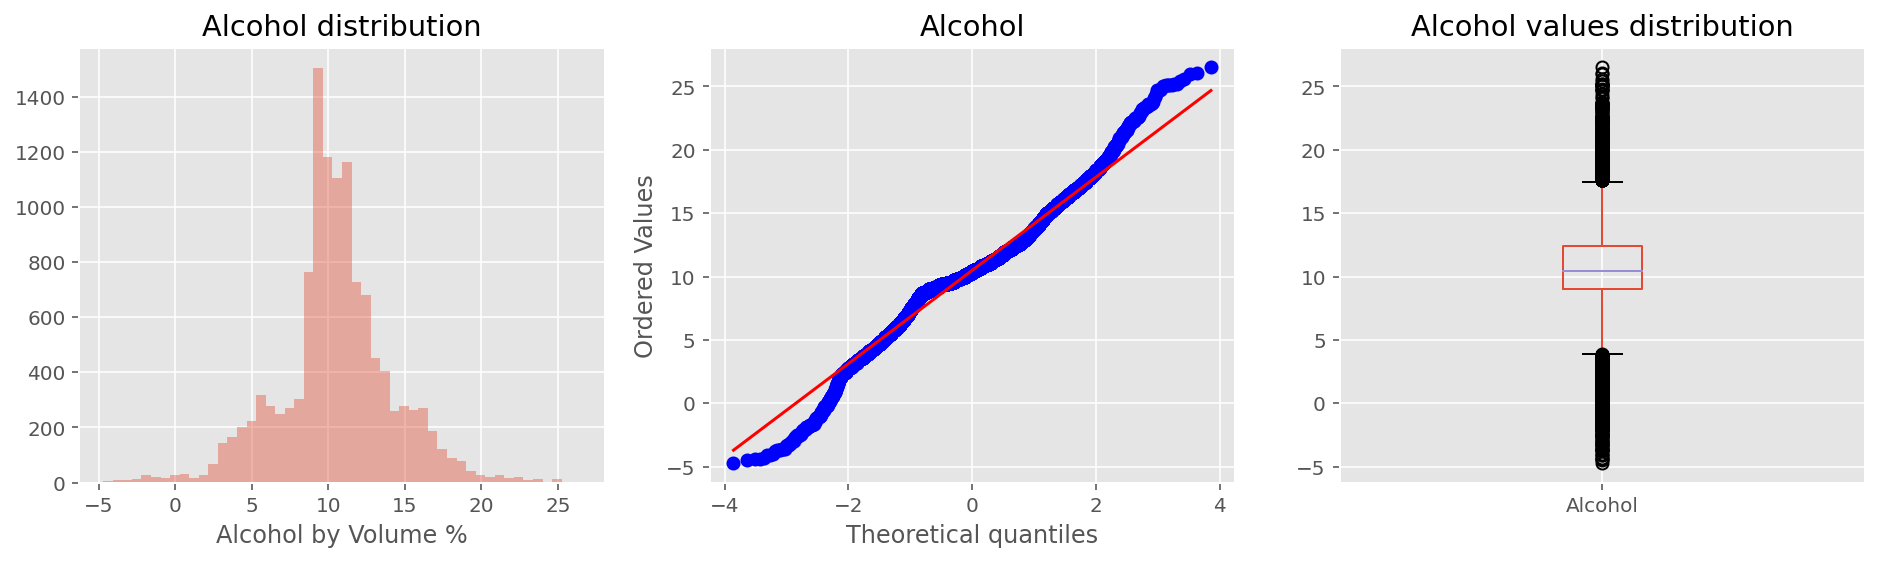

In [ ]:
#Alcohol, getting the non null values (5.1% of the values)
alcohol_notna=df[df['Alcohol'].notnull()]['Alcohol']

#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.distplot(alcohol_notna, kde=False);
plt.title("Alcohol distribution");
plt.xlabel('Alcohol by Volume %')

plt.subplot(1, 3, 2)
probplot(alcohol_notna, plot = plt);
plt.title("Alcohol");

plt.subplot(1, 3, 3)
df.boxplot(column='Alcohol');
plt.title("Alcohol values distribution");

We can see some negative values that will need to be deleted/changed as well as some outliers, since according to the article below, wines bottles range from as little as 5% alcohol by volume to as much as around 21% ABV (Alcohol By Volume) 

https://winefolly.com/tips/alcohol-content-in-wine/

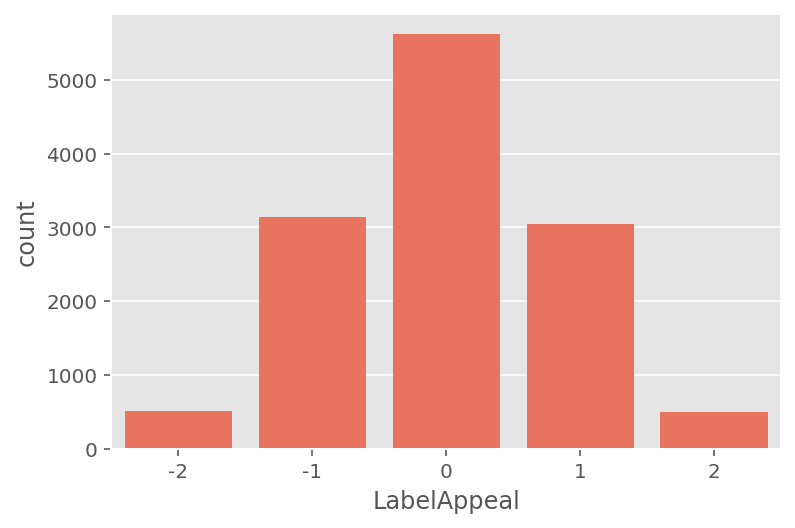

In [ ]:
#LabelAppeal
sns.countplot(x="LabelAppeal",data=df, color='tomato');

Here it seems that the subjective marketing score, that indicates the appeal of the design of the label on the bottle, shows a high number of negative values, which does not neccesarily mean that these are invalid, rather it would likely indicate a negative appealing on the bottle label design. <br> The only transformation that this attribute will require is to get dummy variables.

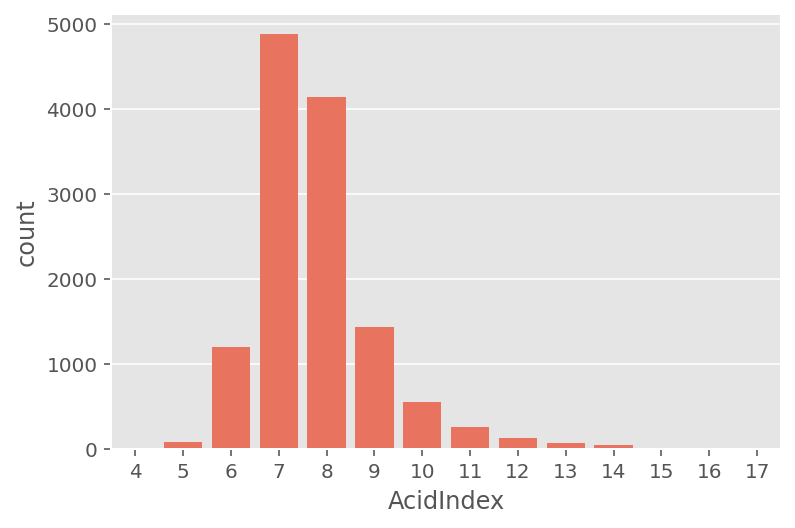

In [ ]:
#AcidIndex, there are no null values
sns.countplot(x="AcidIndex",data=df, color='tomato');

We can see that this values ranges from 4 up to 17, with the majority number of records with an AcidIndex between 6 and 9. We know that this attribute measures total acidity of wine via a weighted average, but there is no much information about how this index was generated, so to allow a better analysis, and avoid overfitting, we can combine values/spare classes. For example:
- 4 =< AcidIndex < 7 => AcidIndex_low
- 7 =< AcidIndex < 10 => AcidIndex_medium
- 10 =< AcidIndex => AcidIndex_high

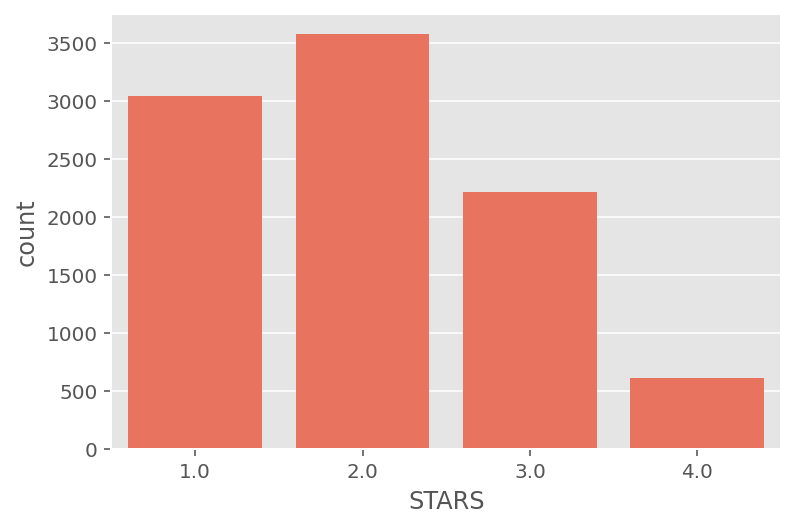

In [ ]:
#STARS, (26.2% of the values are null)
sns.countplot(x="STARS",data=df, color='tomato');

STARS represents wine rating as determined by experts (4 = excellent; 1 = Poor), and it has around 26.2% of missing values, and considering this might provide good predictive power to the response, we can transform missing values into a dummy variable, along with the current 4 values as below:
- STARS = null => Rating_notreviewed
- STARS = 1 => Rating_poor
- STARS = 2 => Rating_good
- STARS = 3 => Rating_verygood
- STARS = 4 => Rating_excellent

This will allow to isolate the impact of each specific STAR level in a machine learning model.

## Data Preparation

### Changes to the STAR column

In [ ]:
#showing first 5 records
df.STARS.head()

0    2.0
1    3.0
2    3.0
3    1.0
4    2.0
Name: STARS, dtype: float64

In [ ]:
#checking null values before transformations
df['STARS'].isnull().sum()

3359

Here we consider that records with null values mean that they did not receive a formal review.

In [ ]:
#filling null values with zero
df['STARS'].fillna(0, inplace=True)

#sanity check
df['STARS'].isnull().sum()

0

In [ ]:
#get dummy variables based on STARS
dummies = pd.get_dummies(df['STARS'], prefix='STARS')

#renaming column names
dummies.columns = ['rating_notreviewed', 
                'rating_poor',
                'rating_good',
                'rating_verygood', 
                'rating_excellent']
#sanity check
dummies.head()

,rating_notreviewed,rating_poor,rating_good,rating_verygood,rating_excellent
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,1,0,0,0
4,0,0,1,0,0


In [ ]:
# merge the dummy variables with the original data (excluding index column)
df_with_dummy = df.iloc[:,1:].join(dummies)

#drop column STARS
df_with_dummy.drop(columns=['STARS'], inplace=True)

#sanity check
df_with_dummy.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,rating_notreviewed,rating_poor,rating_good,rating_verygood,rating_excellent
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,0,0,1,0,0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,0,0,0,1,0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,0,0,0,1,0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,0,1,0,0,0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,0,0,1,0,0


We can see at the right of the dataframe we have new columns corresponding to the values of the rating for that particular wine.

### Changes to the AcidIndex column

In [ ]:
#create a new column based on bucketing the ones that exist for the AcidIndex
df_with_dummy['AcidIndex'].head()

0    8
1    7
2    8
3    6
4    9
Name: AcidIndex, dtype: int64

In [ ]:
#define a list that will contain the corresponding values per each range
AcidIndex_new=[]

#iterate through AcidIndex and save the value to a new range based on:
# 4 =< AcidIndex < 7 => AcidIndex_low
# 7 =< AcidIndex < 10 => AcidIndex_medium
# 10 =< AcidIndex => AcidIndex_high
for value in df_with_dummy['AcidIndex']:
    if value < 7:
        AcidIndex_new.append('AcidIndex_low')
    elif value >= 7 and value < 10:
        AcidIndex_new.append('AcidIndex_medium')
    elif value >= 10:
        AcidIndex_new.append('AcidIndex_high')
        
#create new column based on the results
df_with_dummy['AcidIndex_new']=AcidIndex_new

#sanity check
df_with_dummy.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,rating_notreviewed,rating_poor,rating_good,rating_verygood,rating_excellent,AcidIndex_new
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,-0.59,9.9,0,8,0,0,1,0,0,AcidIndex_medium
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,0.70,NaN,-1,7,0,0,0,1,0,AcidIndex_medium
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,0.48,22.0,-1,8,0,0,0,1,0,AcidIndex_medium
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,1.83,6.2,-1,6,0,1,0,0,0,AcidIndex_low
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,1.77,13.7,0,9,0,0,1,0,0,AcidIndex_medium


In [ ]:
#get dummy variables based on AcidIndex_new
dummies = pd.get_dummies(df_with_dummy['AcidIndex_new'])

# merge the dummy variables with the original data (excluding index column)
df_with_dummy = df_with_dummy.join(dummies)

#drop column AcidIndex
df_with_dummy.drop(columns=['AcidIndex', 'AcidIndex_new'], inplace=True)

#sanity check
df_with_dummy.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,Alcohol,LabelAppeal,rating_notreviewed,rating_poor,rating_good,rating_verygood,rating_excellent,AcidIndex_high,AcidIndex_low,AcidIndex_medium
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,...,9.9,0,0,0,1,0,0,0,0,1
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,...,NaN,-1,0,0,0,1,0,0,0,1
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,...,22.0,-1,0,0,0,1,0,0,0,1
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,...,6.2,-1,0,1,0,0,0,0,1,0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,...,13.7,0,0,0,1,0,0,0,0,1


### Changes to the LabelAppeal

In [ ]:
#get dummy variables based on STARS
dummies = pd.get_dummies(df['LabelAppeal'], prefix='LabelAppeal')

#renaming column names
dummies.columns = ['LabelAppeal_verypoor', 
                'LabelAppeal_poor',
                'LabelAppeal_neutral',
                'LabelAppeal_good', 
                'LabelAppeal_verygood']
#sanity check
dummies.head()

,LabelAppeal_verypoor,LabelAppeal_poor,LabelAppeal_neutral,LabelAppeal_good,LabelAppeal_verygood
0,0,0,1,0,0
1,0,1,0,0,0
2,0,1,0,0,0
3,0,1,0,0,0
4,0,0,1,0,0


In [ ]:
# merge the dummy variables with the original data (excluding index column)
df_with_dummy = df_with_dummy.join(dummies)

#drop column STARS
df_with_dummy.drop(columns=['LabelAppeal'], inplace=True)

#sanity check
df_with_dummy.head()

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,rating_verygood,rating_excellent,AcidIndex_high,AcidIndex_low,AcidIndex_medium,LabelAppeal_verypoor,LabelAppeal_poor,LabelAppeal_neutral,LabelAppeal_good,LabelAppeal_verygood
0,3,3.2,1.160,-0.98,54.2,-0.567,NaN,268.0,0.99280,3.33,...,0,0,0,0,1,0,0,1,0,0
1,3,4.5,0.160,-0.81,26.1,-0.425,15.0,-327.0,1.02792,3.38,...,1,0,0,0,1,0,1,0,0,0
2,5,7.1,2.640,-0.88,14.8,0.037,214.0,142.0,0.99518,3.12,...,1,0,0,0,1,0,1,0,0,0
3,3,5.7,0.385,0.04,18.8,-0.425,22.0,115.0,0.99640,2.24,...,0,0,0,1,0,0,1,0,0,0
4,4,8.0,0.330,-1.26,9.4,NaN,-167.0,108.0,0.99457,3.12,...,0,0,0,0,1,0,0,1,0,0


### Changes to several numeric continuous variables

As we saw in EDA section there are several attributes with negative values, and based on the research we conclude that we need to replace them. If we assume that there was an error in the data entry, we can use the absolute value to replace negative by positive. <br>
Below it is a dataframe that summaries the number of negatives as well as null values in each column.

In [ ]:
#creating a dictionary with the count of null and negative values
d = {'null_count':null_count,'negative_count':negatives_count}
new_df=pd.DataFrame(d)
new_df

,null_count,negative_count
AcidIndex,0,0.0
Alcohol,653,118.0
Chlorides,638,3197.0
CitricAcid,0,2966.0
Density,0,0.0
FixedAcidity,0,1621.0
FreeSulfurDioxide,647,3036.0
INDEX,0,NaN
LabelAppeal,0,3640.0
ResidualSugar,616,3136.0


We can see that the following columns will be impacted with the absolute value: Alcohol, Chlorides, CitricAcid, FixedAcidity, FreeSulfurDioxide, ResidualSugar, Sulphates, TotalSulfurDioxide and VolatileAcidity. <br>
Negative values in LabelAppeal was considered to be valid in this context.

In [ ]:
#checking original dataframe
df_with_dummy.head(1)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,rating_verygood,rating_excellent,AcidIndex_high,AcidIndex_low,AcidIndex_medium,LabelAppeal_verypoor,LabelAppeal_poor,LabelAppeal_neutral,LabelAppeal_good,LabelAppeal_verygood
0,3,3.2,1.16,-0.98,54.2,-0.567,NaN,268.0,0.9928,3.33,...,0,0,0,0,1,0,0,1,0,0


In [ ]:
#get absolute values
df_absolute = df_with_dummy.abs()

#sanity check
df_absolute.head(1)

,TARGET,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,...,rating_verygood,rating_excellent,AcidIndex_high,AcidIndex_low,AcidIndex_medium,LabelAppeal_verypoor,LabelAppeal_poor,LabelAppeal_neutral,LabelAppeal_good,LabelAppeal_verygood
0,3.0,3.2,1.16,0.98,54.2,0.567,NaN,268.0,0.9928,3.33,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
#drop old columns
columns=['Alcohol', 'Chlorides', 'CitricAcid', 
         'FixedAcidity','FreeSulfurDioxide', 
         'ResidualSugar', 'Sulphates',
        'TotalSulfurDioxide', 'VolatileAcidity']

df_with_dummy.drop(columns=columns, inplace=True)

In [ ]:
#append absolute values
df_with_dummy = df_with_dummy.join(df_absolute[columns])

#sanity check
df_with_dummy.head()

,TARGET,Density,pH,rating_notreviewed,rating_poor,rating_good,rating_verygood,rating_excellent,AcidIndex_high,AcidIndex_low,...,LabelAppeal_verygood,Alcohol,Chlorides,CitricAcid,FixedAcidity,FreeSulfurDioxide,ResidualSugar,Sulphates,TotalSulfurDioxide,VolatileAcidity
0,3,0.99280,3.33,0,0,1,0,0,0,0,...,0,9.9,0.567,0.98,3.2,NaN,54.2,0.59,268.0,1.160
1,3,1.02792,3.38,0,0,0,1,0,0,0,...,0,NaN,0.425,0.81,4.5,15.0,26.1,0.70,327.0,0.160
2,5,0.99518,3.12,0,0,0,1,0,0,0,...,0,22.0,0.037,0.88,7.1,214.0,14.8,0.48,142.0,2.640
3,3,0.99640,2.24,0,1,0,0,0,0,1,...,0,6.2,0.425,0.04,5.7,22.0,18.8,1.83,115.0,0.385
4,4,0.99457,3.12,0,0,1,0,0,0,0,...,0,13.7,NaN,1.26,8.0,167.0,9.4,1.77,108.0,0.330


In [ ]:
#chequing that there are no negative values, and there aren't
negatives_count=df_with_dummy.iloc[:,1:].where(df_with_dummy.iloc[:,1:]<0).count()
negatives_count

Density                 0
pH                      0
rating_notreviewed      0
rating_poor             0
rating_good             0
rating_verygood         0
rating_excellent        0
AcidIndex_high          0
AcidIndex_low           0
AcidIndex_medium        0
LabelAppeal_verypoor    0
LabelAppeal_poor        0
LabelAppeal_neutral     0
LabelAppeal_good        0
LabelAppeal_verygood    0
Alcohol                 0
Chlorides               0
CitricAcid              0
FixedAcidity            0
FreeSulfurDioxide       0
ResidualSugar           0
Sulphates               0
TotalSulfurDioxide      0
VolatileAcidity         0
dtype: int64

Now we have a dataframe with positive values in the respective columns

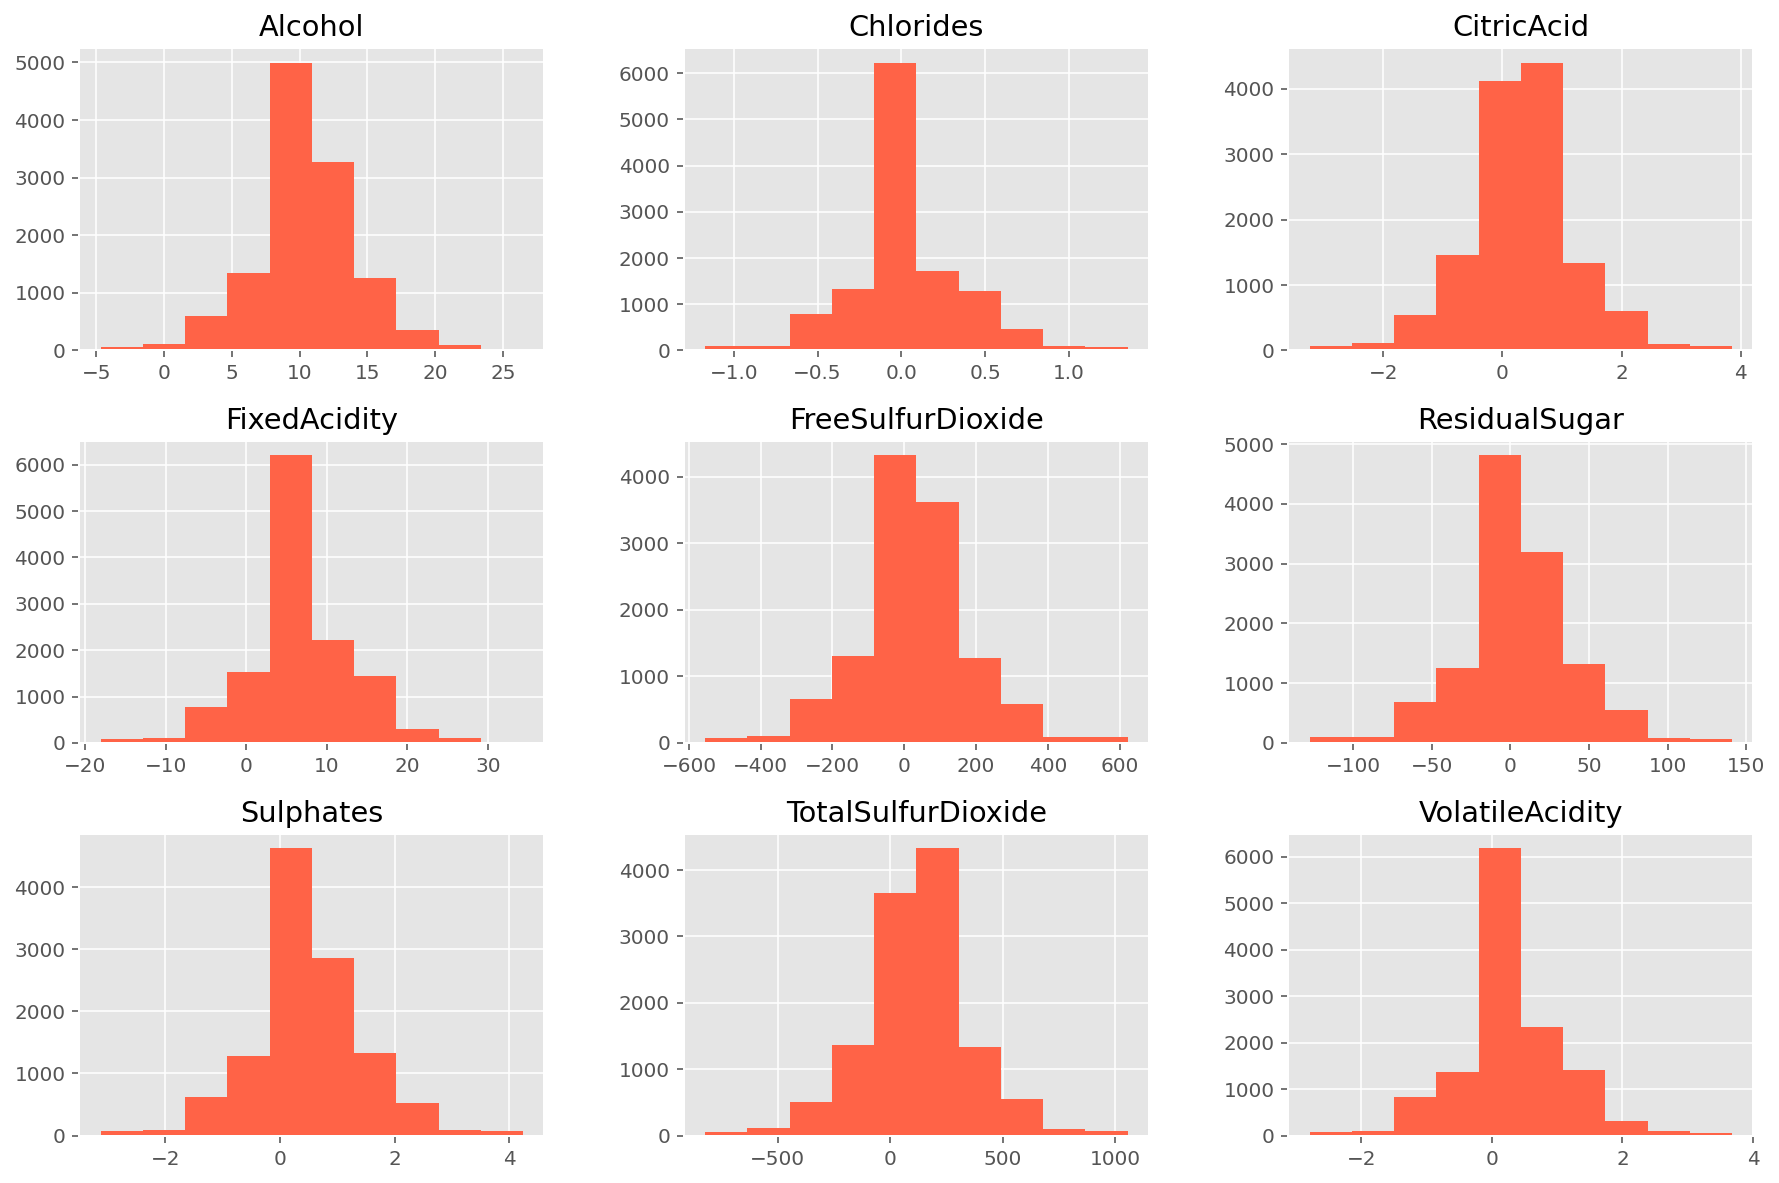

In [ ]:
#before applying absolute values
df[columns].hist(figsize=(15,10), color='tomato');

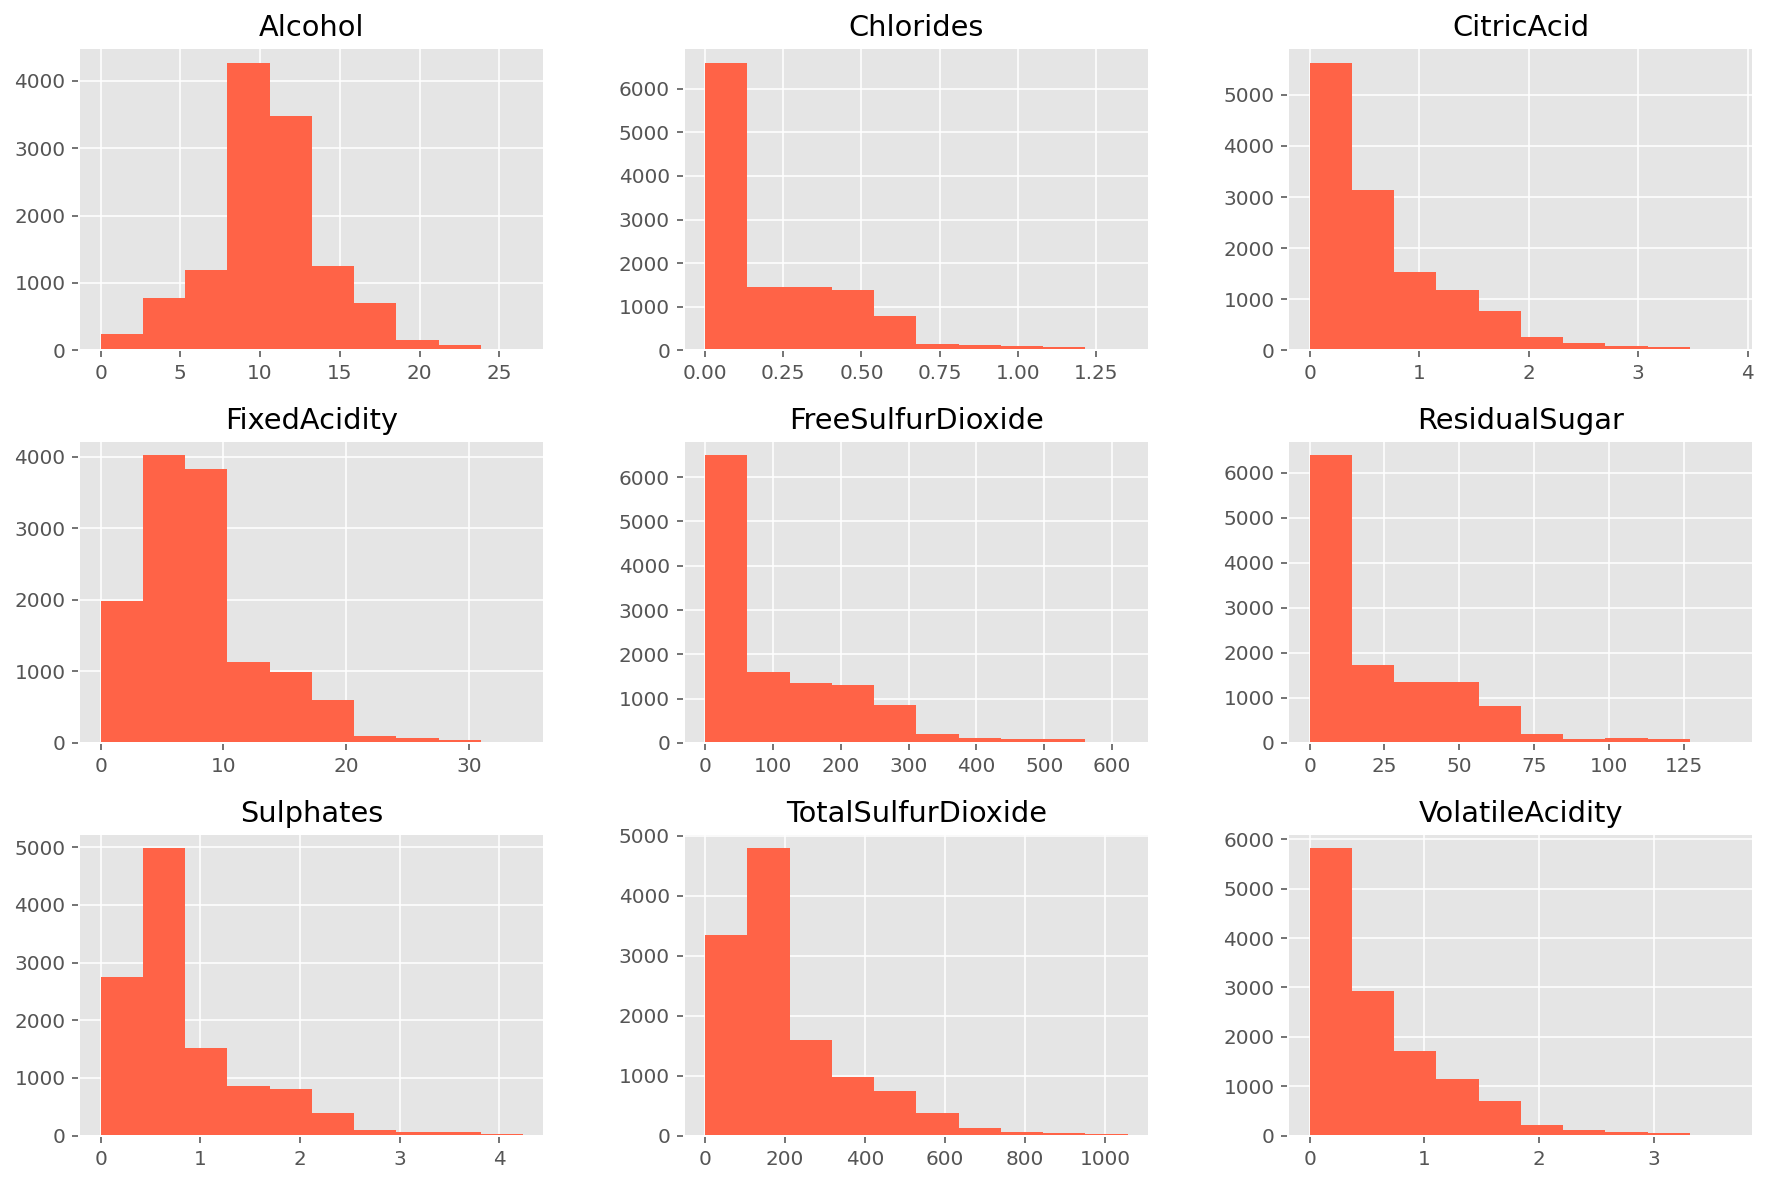

In [ ]:
#after applying absolute values
df_with_dummy[columns].hist(figsize=(15,10), color='tomato');

After applying the absolute values we can see the severe right skew of the distribution for all variables but Alcohol, and it seems to be evidence of outlier values that we identified earlier in the analysis.

#### Outliers - Alcohol

In [ ]:
# find all wine rows that have Alcohol values whose values are > 
# 2.5 standard deviations from the mean of data in that column
Alcohol_outliers = df_with_dummy[np.abs(df_with_dummy['Alcohol'] - df_with_dummy['Alcohol'].mean() ) > (2.5 * df_with_dummy['Alcohol'].std() )]
print(Alcohol_outliers.Alcohol.min())
print(Alcohol_outliers.Alcohol.max())
print(Alcohol_outliers.shape[0])

0.0
26.5
269


Since we already took the absolute value of this attribute we need to make sure that that all the values we have are valid values.<br/> Here we see the min, max, and statistical outliers. Since the min is 0 and the max is 26.1% we can ignore statistical outliers as all of these values are valid.<br/> However, there is a further concern that 0 may not be a valid number since a wine, by definition, needs alcohol.

In [ ]:
Alcohol_outliers = df_with_dummy[np.abs(df_with_dummy['Alcohol']==0)]
print(Alcohol_outliers.shape[0])

2


Upon further research we discovered that there is a new kind of wine that goes through a dealcoholizing process and has 0% alcohol. <br/>In any case the impact to any study will be rather low since there are only two observations that have a 0 for Alcohol.<br/>
As such we will not be removing any of this data.

#### Outliers - Chlorides

In [ ]:
# find all wine rows that have Chlorides values whose values are > 
# 2.5 standard deviations from the mean of data in that column
Chlorides_outliers = df_with_dummy[np.abs(df_with_dummy['Chlorides'] - df_with_dummy['Chlorides'].mean() ) > (2.5 * df_with_dummy['Chlorides'].std() )]
print(Chlorides_outliers.Chlorides.min())
print(Chlorides_outliers.shape[0])

0.809
345


We see that, according to the research this can still be a valid value, hence we use the limit found in the research, which is 1.0.

In [ ]:
#getting Chlorides > 1 as outlier
Chlorides_outliers = df_with_dummy[df_with_dummy['Chlorides'] > 1]
print(Chlorides_outliers.Chlorides.min())
print(Chlorides_outliers.shape[0])

1.001
163


We see than now there are more rows included as valid values. Delete these rows.

In [ ]:
#checking previous shape
print(df_with_dummy.shape)

# now remove the extreme outliers from the temporary series
df_with_dummy.drop(Chlorides_outliers.index.values, inplace=True)

#sanity check
print(df_with_dummy.shape)

(12795, 25)
(12632, 25)


#### Outliers - CitricAcid

In [ ]:
# find all wine rows that have CitricAcid values whose values are > 
# 2.5 standard deviations from the mean of data in that column
CitricAcid_outliers = df_with_dummy[np.abs(df_with_dummy['CitricAcid'] - df_with_dummy['CitricAcid'].mean() ) > (2.5 * df_with_dummy['CitricAcid'].std() )]
print(CitricAcid_outliers.CitricAcid.min())
print(CitricAcid_outliers.shape[0])

2.21
333


According to the research this value is greater than 1.5, will keep the one with 2.5 std and remove these records.

In [ ]:
# now remove the extreme outliers from the temporary series
df_with_dummy.drop(CitricAcid_outliers.index.values, inplace=True)

#sanity check
df_with_dummy.shape

(12299, 25)

#### Outliers - FixedAcidity

In [ ]:
# find all wine rows that have FixedAcidity values whose values are > 
# 2.5 standard deviations from the mean of data in that column
FixedAcidity_outliers = df_with_dummy[np.abs(df_with_dummy['FixedAcidity'] - df_with_dummy['FixedAcidity'].mean() ) > (2.5 * df_with_dummy['FixedAcidity'].std() )]
print(FixedAcidity_outliers.FixedAcidity.min())
print(FixedAcidity_outliers.shape[0])

20.6
233


According to the research this value is greater than 17 g/L, will keep the one with 2.5 std and remove these records.

In [ ]:
# now remove the extreme outliers from the temporary series
df_with_dummy.drop(FixedAcidity_outliers.index.values, inplace=True)

#sanity check
df_with_dummy.shape

(12066, 25)

#### Outliers - FreeSulfureDioxide

In [ ]:
# find all wine rows that have FreeSulfurDioxide values whose values are > 
# 2.5 standard deviations from the mean of data in that column
FreeSulfurDioxide_outliers = df_with_dummy[np.abs(df_with_dummy['FreeSulfurDioxide'] - df_with_dummy['FreeSulfurDioxide'].mean() ) > (2.5 * df_with_dummy['FreeSulfurDioxide'].std() )]
print(FreeSulfurDioxide_outliers.FixedAcidity.min())
print(FreeSulfurDioxide_outliers.shape[0])

0.0
299


We see that, according to the research this can still be a valid value, hence we use the limit found in the research, which is 200

#### Outliers - ResidualSugar

In [ ]:
# find all wine rows that have ResidualSugar values whose values are > 
# 2.5 standard deviations from the mean of data in that column
ResidualSugar_outliers = df_with_dummy[np.abs(df_with_dummy['ResidualSugar'] - df_with_dummy['ResidualSugar'].mean() ) > (2.5 * df_with_dummy['ResidualSugar'].std() )]


In [ ]:
ResidualSugar_outliers = df_with_dummy['ResidualSugar']
print(ResidualSugar_outliers.min())
print(ResidualSugar_outliers.max())

0.0
141.15


As we described earlier, wines range from 0–220 grams per liter sugar (g/L), depending on the style (https://winefolly.com/deep-dive/sugar-in-wine-chart/) so this means that values are all valid and do not need to be removed.

#### Outliers - Sulphates

In [ ]:
# find all wine rows that have TotalSulfureDioxide values whose values are > 
# 2.5 standard deviations from the mean of data in that column
Sulphates_outliers = df_with_dummy[np.abs(df_with_dummy['Sulphates'] - df_with_dummy['Sulphates'].mean() ) > (2.5 * df_with_dummy['Sulphates'].std() )]
print(Sulphates_outliers.Sulphates.min())
print(Sulphates_outliers.shape[0])

2.48
264


Our research told us that any wine above 2.5 g/L of Sulphates was an outlier, here we find that alignes with the satatistical definitions of an outlier in this data set where the lowest outlier identified has 2.49 g/L. We will now remove the outliers.

In [ ]:
# now remove the extreme outliers from the temporary series
df_with_dummy.drop(Sulphates_outliers.index.values, inplace=True)

#sanity check
df_with_dummy.shape

(11802, 25)

#### Outliers - TotalSulfurDioxide

In [ ]:
# find all wine rows that have TotalSulfureDioxide values whose values are > 
# 2.5 standard deviations from the mean of data in that column
TotalSulfurDioxide_outliers = df_with_dummy[np.abs(df_with_dummy['TotalSulfurDioxide'] - df_with_dummy['TotalSulfurDioxide'].mean() ) > (2.5 * df_with_dummy['TotalSulfurDioxide'].std() )]
print(TotalSulfurDioxide_outliers.TotalSulfurDioxide.max())
print(TotalSulfurDioxide_outliers.shape[0])

1057.0
296


According to our research, it seems reasonable to consider values above 500 mg/l as outliers. This differs with the statistical definition and we will opt for the former rather than the latter.

In [ ]:
#reassign the value of the outiler table to exclude the values > 500 
TotalSulfurDioxide_outliers = df_with_dummy[df_with_dummy['TotalSulfurDioxide']>500]

In [ ]:
# now remove the extreme outliers from the temporary series
df_with_dummy.drop(TotalSulfurDioxide_outliers.index.values, inplace=True)

#sanity check
df_with_dummy.shape

(11039, 25)

#### Outliers - VolatileAcidity

In [ ]:
# find all wine rows that have VolatileAcidity values whose values are > 
# 2.5 standard deviations from the mean of data in that column
VolatileAcidity_outliers = df_with_dummy[np.abs(df_with_dummy['VolatileAcidity'] - df_with_dummy['VolatileAcidity'].mean() ) > (2.5 * df_with_dummy['VolatileAcidity'].std() )]
print(VolatileAcidity_outliers.VolatileAcidity.min())
print(VolatileAcidity_outliers.shape[0])

2.04
298


While our research indicated that this number has a legal limit of 1.2 in the US we don't know where this data originated from. Because of this we will need to use a standard statistical definition of 2.5 standard deviations from the mean

In [ ]:
# now remove the extreme outliers from the temporary series
df_with_dummy.drop(VolatileAcidity_outliers.index.values, inplace=True)

#sanity check
df_with_dummy.shape

(10741, 25)

### Filling Missing the Values 

In [ ]:
#getting exact number of null values in each column
null_count=df_with_dummy[columns].isnull().sum()
null_count

Alcohol                542
Chlorides              537
CitricAcid               0
FixedAcidity             0
FreeSulfurDioxide      540
ResidualSugar          516
Sulphates             1050
TotalSulfurDioxide     617
VolatileAcidity          0
dtype: int64

There are 6 columns that need to be fixed now, all of them have around 5% of null values, with the Sulphates with 10%.

In [ ]:
#checking correlations, adding response variable
columns.append('TARGET')
df_with_dummy.corr()


,TARGET,Density,pH,rating_notreviewed,rating_poor,rating_good,rating_verygood,rating_excellent,AcidIndex_high,AcidIndex_low,...,LabelAppeal_verygood,Alcohol,Chlorides,CitricAcid,FixedAcidity,FreeSulfurDioxide,ResidualSugar,Sulphates,TotalSulfurDioxide,VolatileAcidity
TARGET,1.000000,-0.033372,-0.007329,-0.572119,-0.128576,0.246095,0.359143,0.276672,-0.218745,0.061332,...,0.160617,0.063091,-0.017576,0.021905,-0.055266,0.030006,0.004890,-0.035135,0.035604,-0.076862
Density,-0.033372,1.000000,0.003974,0.024117,0.003708,-0.005789,-0.020856,-0.007787,0.024732,-0.035001,...,0.014206,0.000598,0.023709,-0.015763,0.000213,0.006614,0.000789,0.011297,-0.005083,-0.001188
pH,-0.007329,0.003974,1.000000,0.009635,0.006283,-0.008065,-0.013229,0.008067,-0.028819,0.056248,...,0.010359,-0.015180,0.015769,-0.012577,-0.004596,-0.015675,0.000603,0.019715,0.003905,0.004365
rating_notreviewed,-0.572119,0.024117,0.009635,1.000000,-0.332234,-0.368922,-0.270301,-0.133618,0.163111,-0.032021,...,-0.024699,-0.031601,0.017974,-0.027282,0.040659,-0.018119,-0.007414,0.024680,-0.033194,0.039058
rating_poor,-0.128576,0.003708,0.006283,-0.332234,1.000000,-0.349975,-0.256419,-0.126755,-0.012033,-0.006523,...,-0.067086,-0.016212,-0.021331,0.011673,0.012313,-0.017649,-0.003834,-0.013925,0.004490,0.024542
rating_good,0.246095,-0.005789,-0.008065,-0.368922,-0.349975,1.000000,-0.284735,-0.140753,-0.064713,0.007811,...,-0.030016,-0.009897,0.014382,0.015815,-0.029687,0.032985,0.003721,-0.004223,0.023773,-0.037155
rating_verygood,0.359143,-0.020856,-0.013229,-0.270301,-0.256419,-0.284735,1.000000,-0.103127,-0.077870,0.026748,...,0.078755,0.044365,-0.011306,0.001862,-0.019990,-0.001470,0.003479,-0.000591,0.014110,-0.016456
rating_excellent,0.276672,-0.007787,0.008067,-0.133618,-0.126755,-0.140753,-0.103127,1.000000,-0.036655,0.014915,...,0.107874,0.039367,-0.004297,-0.003856,-0.010215,0.005610,0.008965,-0.012674,-0.015846,-0.021859
AcidIndex_high,-0.218745,0.024732,-0.028819,0.163111,-0.012033,-0.064713,-0.077870,-0.036655,1.000000,-0.101003,...,0.013204,-0.012494,0.026227,0.032081,0.120146,-0.029437,-0.011068,0.024177,-0.037242,0.042866
AcidIndex_low,0.061332,-0.035001,0.056248,-0.032021,-0.006523,0.007811,0.026748,0.014915,-0.101003,1.000000,...,-0.009341,0.059503,-0.009144,-0.023746,-0.091922,0.012271,-0.007890,-0.008009,0.008150,-0.004838


There are no strong correlations between the atributes and the response variable, neither between the explanatory variables, hence a regression model to fill missing data does not sound like a good approach. <br>
As we saw at the beginning of this analysis there were a low correlation between the null values, suggesting that the null values are located in only one column at a time. 

In [ ]:
#creating a copy of the df
copy=df_with_dummy.copy()

#Getting records where at least there is one null value
records_to_delete=copy.dropna(how='any')
records_to_delete

,TARGET,Density,pH,rating_notreviewed,rating_poor,rating_good,rating_verygood,rating_excellent,AcidIndex_high,AcidIndex_low,...,LabelAppeal_verygood,Alcohol,Chlorides,CitricAcid,FixedAcidity,FreeSulfurDioxide,ResidualSugar,Sulphates,TotalSulfurDioxide,VolatileAcidity
3,3,0.99640,2.24,0,1,0,0,0,0,1,...,0,6.2,0.425,0.04,5.7,22.0,18.8,1.83,115.0,0.385
5,0,0.99940,3.20,1,0,0,0,0,1,0,...,0,15.4,0.556,0.59,11.3,37.0,2.2,1.29,15.0,0.320
6,0,0.99572,3.49,1,0,0,0,0,0,0,...,0,10.3,0.060,0.40,7.7,287.0,21.5,1.21,156.0,0.290
9,6,0.94724,3.09,0,0,0,0,1,0,0,...,0,12.6,0.277,0.39,5.5,62.0,1.8,0.75,180.0,0.220
10,0,0.99340,4.31,0,1,0,0,0,0,1,...,0,13.1,0.022,0.15,17.2,551.0,33.8,0.56,65.0,0.520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12781,0,0.99810,2.00,1,0,0,0,0,1,0,...,0,9.9,0.155,0.57,11.6,3.0,3.2,0.70,55.0,1.040
12786,0,0.99524,2.73,1,0,0,0,0,0,0,...,0,13.6,0.478,1.15,6.8,228.0,3.9,0.10,29.0,0.130
12788,4,0.99830,2.83,0,0,0,1,0,0,0,...,0,9.3,0.633,0.38,8.4,208.0,37.1,0.25,220.0,0.300
12789,4,0.99710,3.45,0,1,0,0,0,0,0,...,0,9.5,0.525,0.29,4.4,30.0,1.9,0.59,391.0,0.220


We can see that there is a big number of rows to be deleted, that have at least one null value in the corresponding columns, however this would mean to also delete valid data values located in the rest of the columns. <br>
Considering that the correlation with the response variable is not high I decided to drop this columns. 

#### filling Alcohol

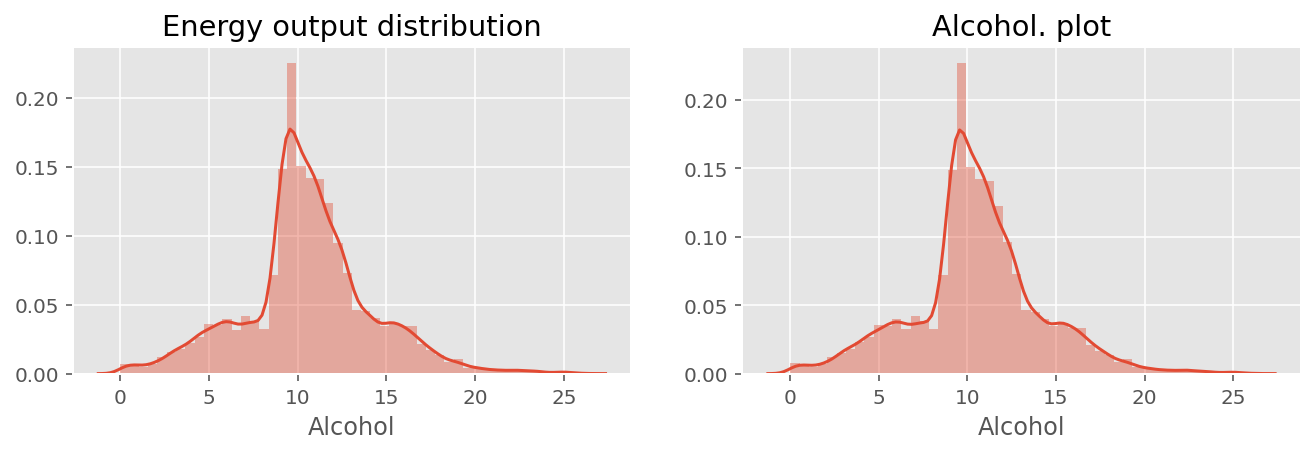

In [ ]:
#filling missing values for Alcohol, strategy backwardsfill
df_with_dummy.Alcohol.bfill(inplace =True)

#checking distribution before and after
fig = plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
sns.distplot(df_with_dummy["Alcohol"]);
plt.title("Energy output distribution");

plt.subplot(1, 2, 2)
sns.distplot(copy[copy["Alcohol"].notnull()]["Alcohol"]);
plt.title("Alcohol. plot");

#### filling Chlorides
Using forward fill

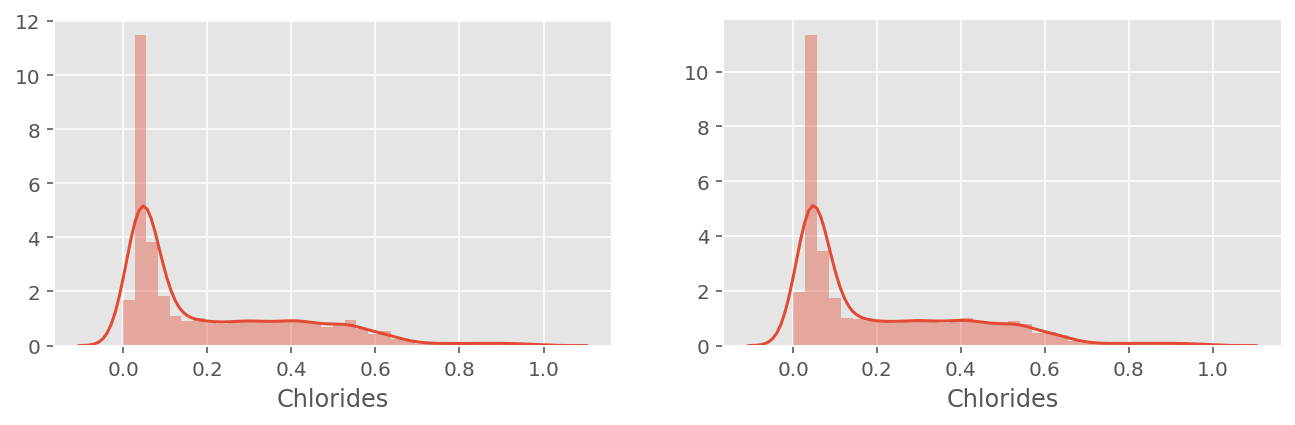

In [ ]:
#filling missing values for Alcohol, strategy backwardsfill
df_with_dummy.Chlorides.ffill(inplace =True)

#checking distribution before and after
fig = plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
sns.distplot(df_with_dummy["Chlorides"]);

plt.subplot(1, 2, 2)
sns.distplot(copy[copy["Chlorides"].notnull()]["Chlorides"]);

#### filling FreeSulfurDioxide

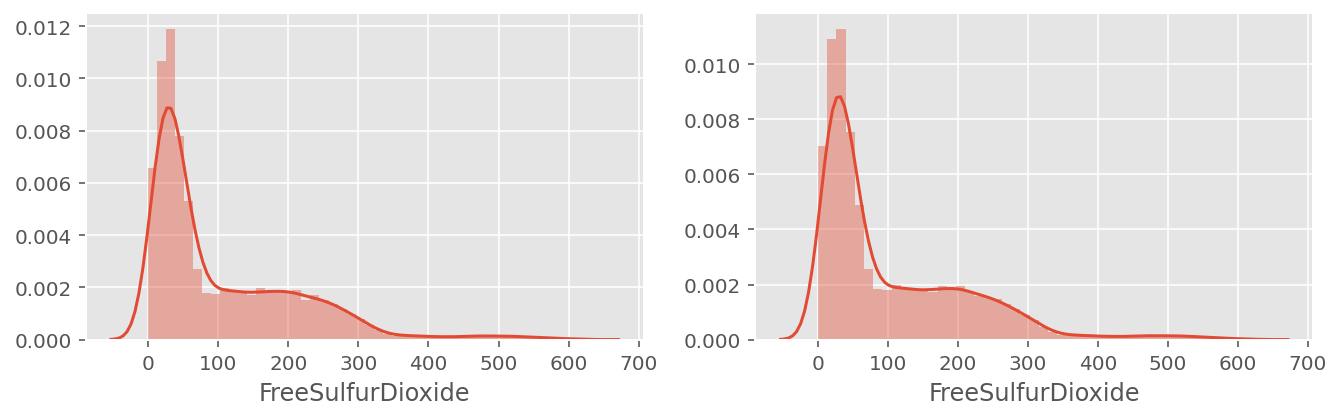

In [ ]:
#filling missing values for Alcohol, strategy backwardsfill
df_with_dummy.FreeSulfurDioxide.bfill(inplace =True)

#checking distribution before and after
fig = plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
sns.distplot(df_with_dummy["FreeSulfurDioxide"]);

plt.subplot(1, 2, 2)
sns.distplot(copy[copy["FreeSulfurDioxide"].notnull()]["FreeSulfurDioxide"]);

#### filling ResidualSugar

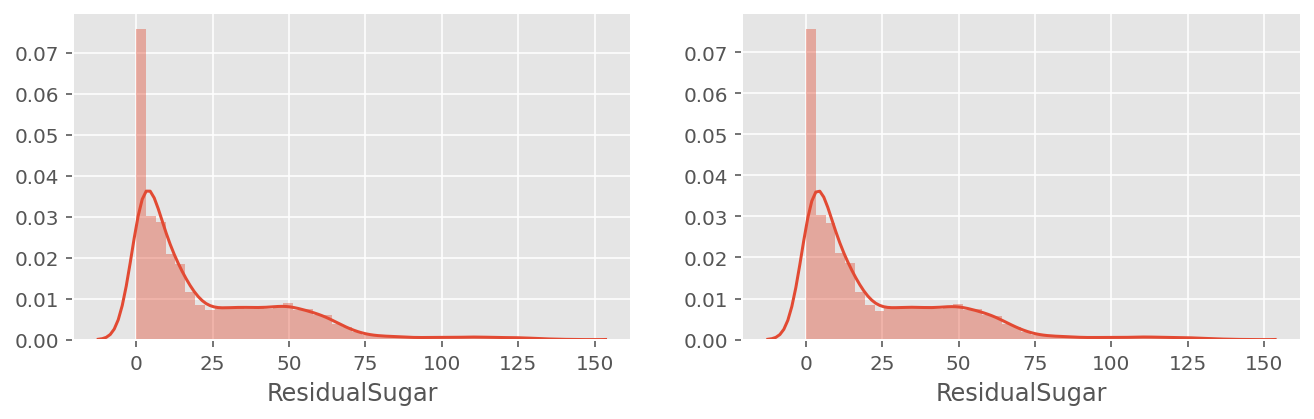

In [ ]:
#filling missing values for Alcohol, strategy backwardsfill
df_with_dummy.ResidualSugar.bfill(inplace =True)

#checking distribution before and after
fig = plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
sns.distplot(df_with_dummy["ResidualSugar"]);

plt.subplot(1, 2, 2)
sns.distplot(copy[copy["ResidualSugar"].notnull()]["ResidualSugar"]);

#### filling Sulphates

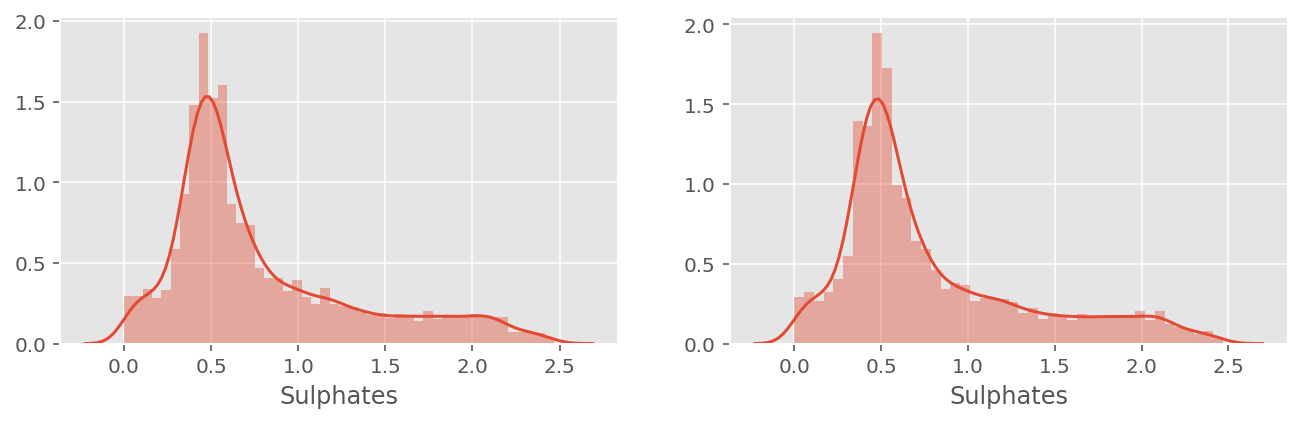

In [ ]:
#filling missing values for Alcohol, strategy backwardsfill
df_with_dummy.Sulphates.ffill(inplace =True)

#checking distribution before and after
fig = plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
sns.distplot(df_with_dummy["Sulphates"]);

plt.subplot(1, 2, 2)
sns.distplot(copy[copy["Sulphates"].notnull()]["Sulphates"]);

#### filling TotalSulfurDioxide

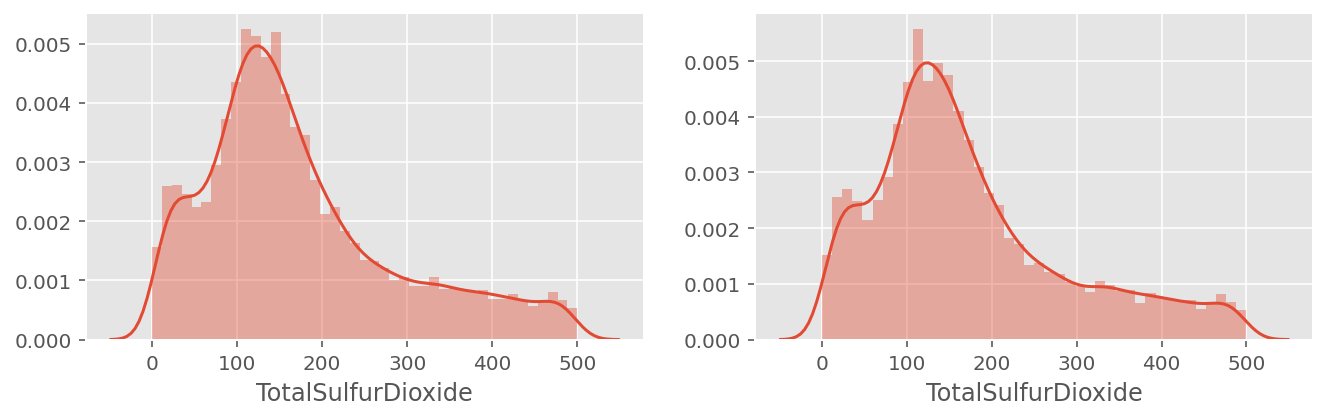

In [ ]:
#filling missing values for Alcohol, strategy backwardsfill
df_with_dummy.TotalSulfurDioxide.ffill(inplace =True)

#checking distribution before and after
fig = plt.figure(figsize=(11,3))

plt.subplot(1, 2, 1)
sns.distplot(df_with_dummy["TotalSulfurDioxide"]);

plt.subplot(1, 2, 2)
sns.distplot(copy[copy["TotalSulfurDioxide"].notnull()]["TotalSulfurDioxide"]);

### Box-Cox Transformation


Here we will apply transformations in order to fix the right skew in the data and standarize.

In [ ]:
columns

['Alcohol',
 'Chlorides',
 'CitricAcid',
 'FixedAcidity',
 'FreeSulfurDioxide',
 'ResidualSugar',
 'Sulphates',
 'TotalSulfurDioxide',
 'VolatileAcidity',
 'TARGET']

In [ ]:
#creating a copy of the dataframe
df_with_dummy_box_numeric = df_with_dummy[columns].copy()

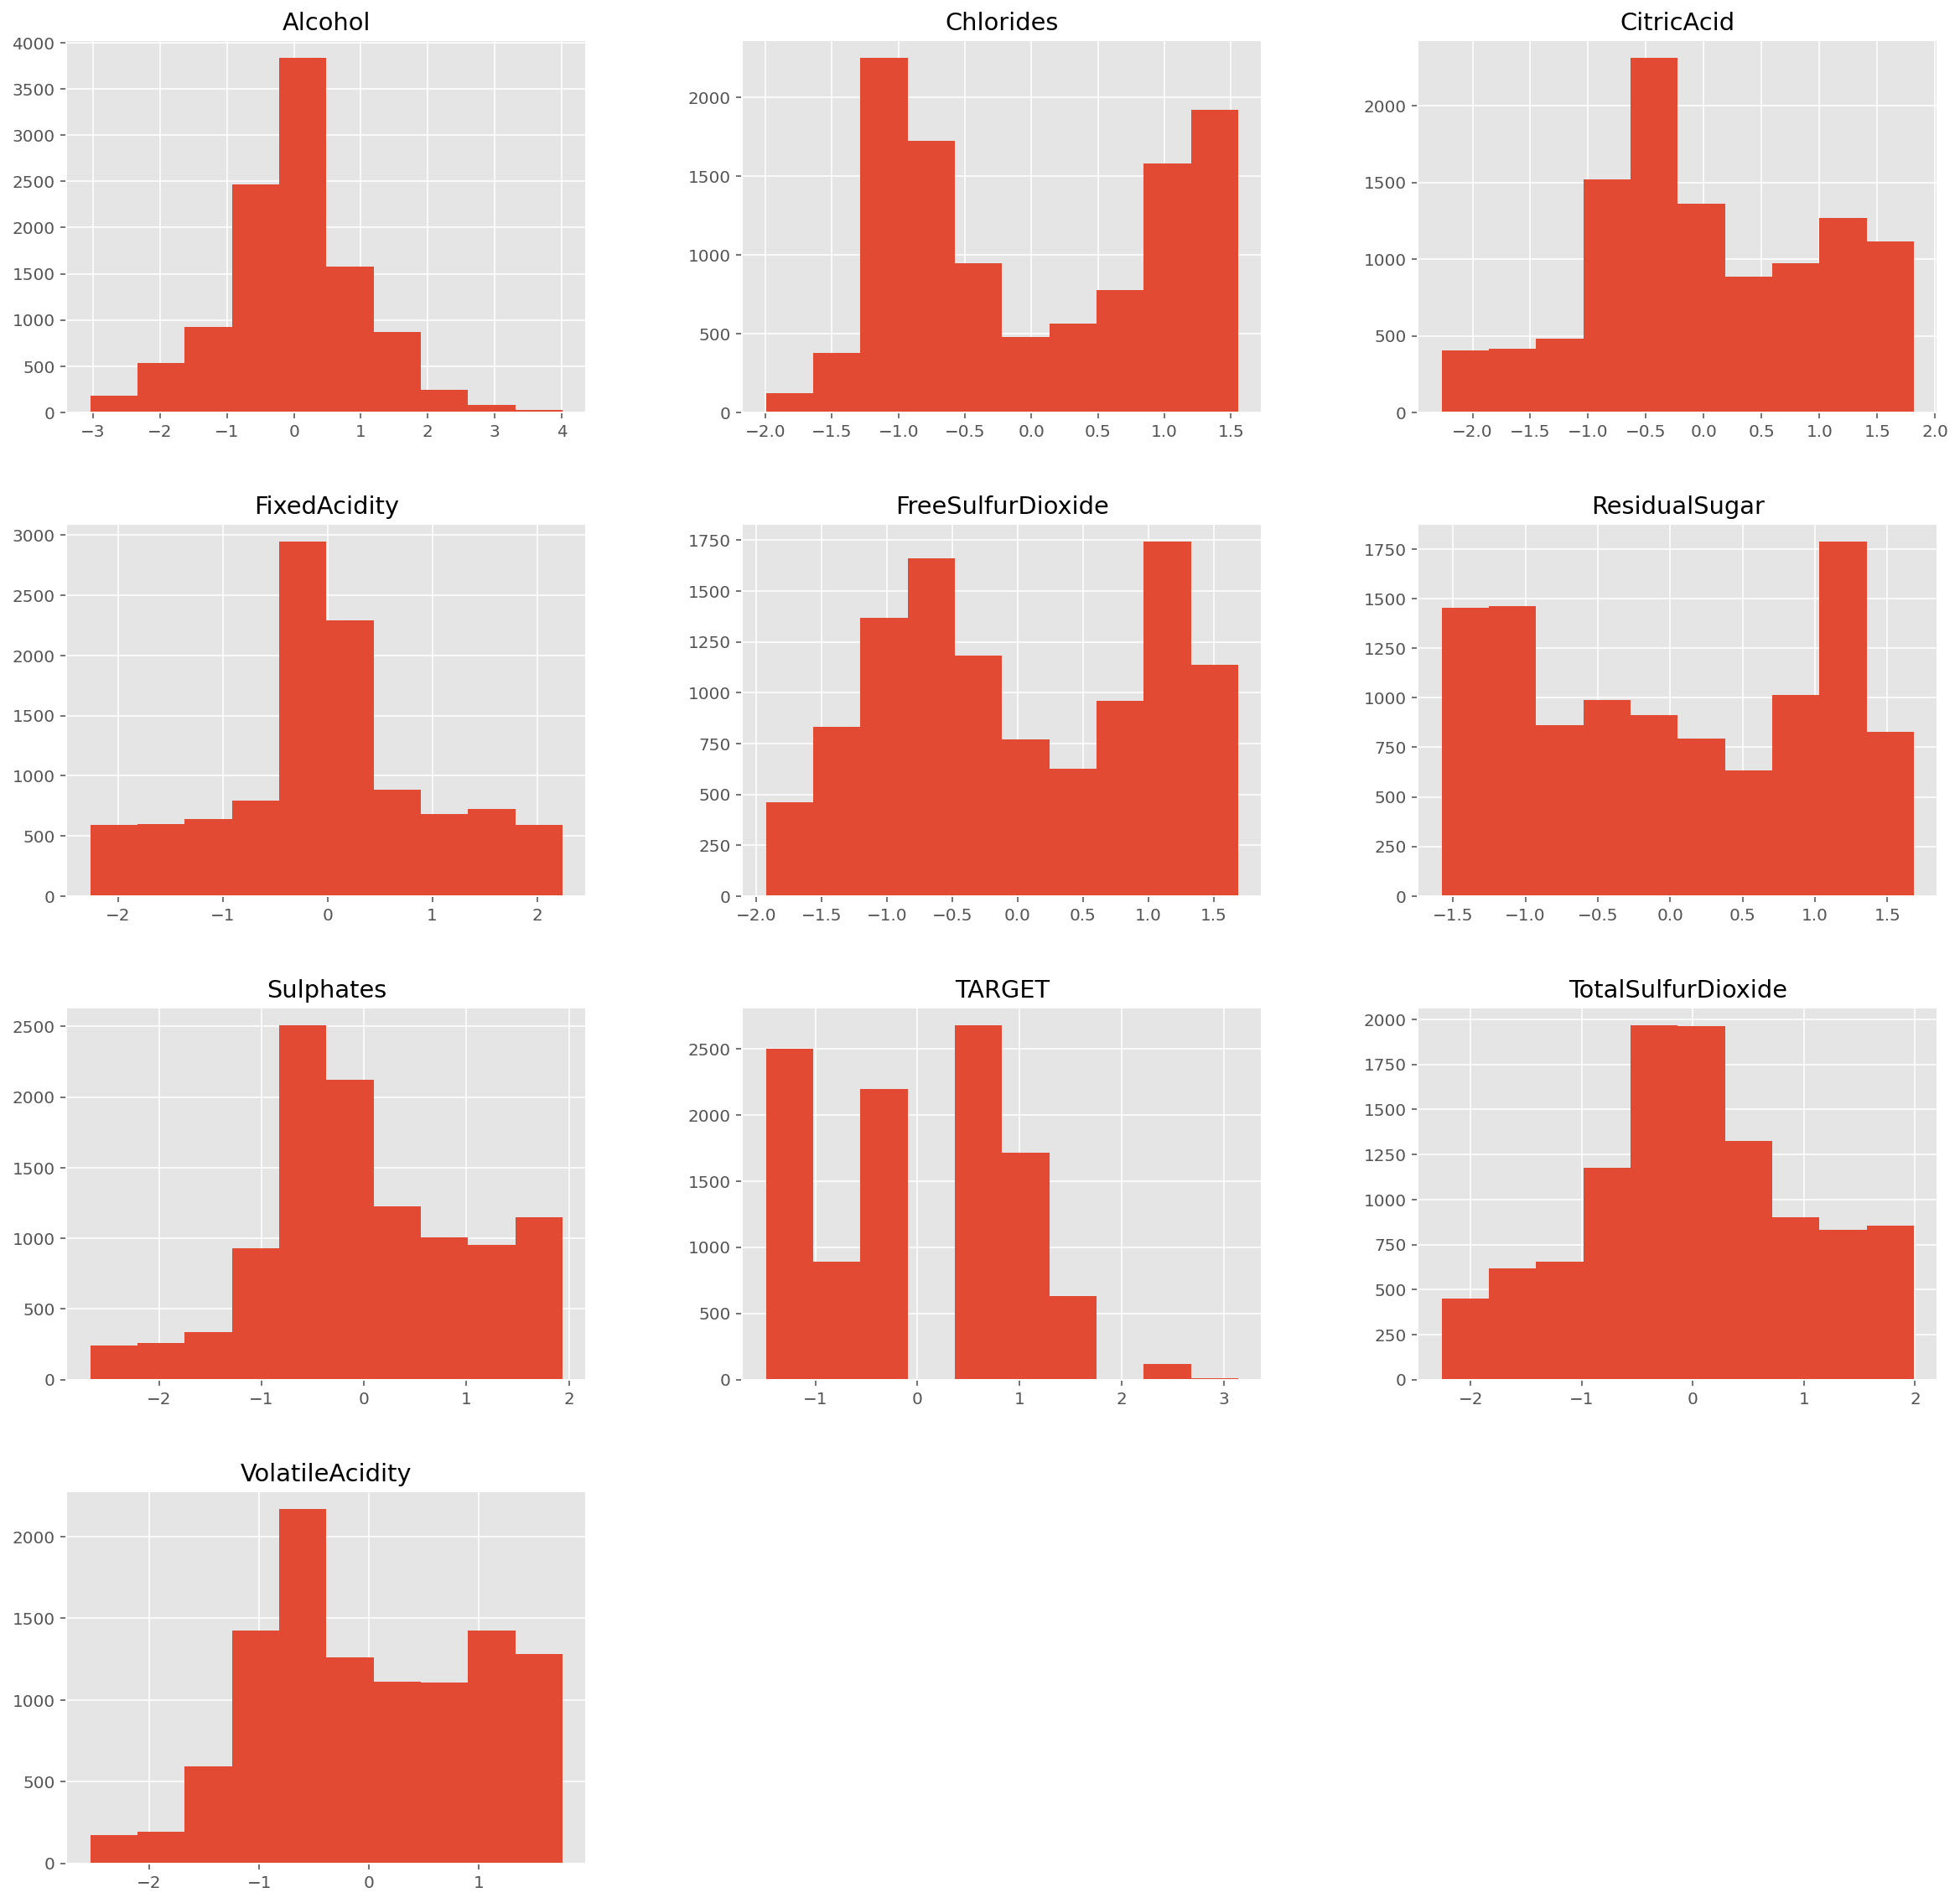

In [ ]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

# perform a box-cox transform of the dataset
scaler = MinMaxScaler(feature_range=(1, 2))

power = PowerTransformer(method='box-cox')

pipeline = Pipeline(steps=[('s', scaler),
                           ('p', power)])

df_with_dummy_box_numeric = pipeline.fit_transform(df_with_dummy_box_numeric)
# convert the array back to a dataframe
df_with_dummy_box_numeric = pd.DataFrame(df_with_dummy_box_numeric)
# histograms of the variables
df_with_dummy_box_numeric.columns = columns
df_with_dummy_box_numeric.hist(figsize=(20,20))
pyplot.show()

In [ ]:
#sanity check
df_with_dummy.head(5)

,TARGET,Density,pH,rating_notreviewed,rating_poor,rating_good,rating_verygood,rating_excellent,AcidIndex_high,AcidIndex_low,...,LabelAppeal_verygood,Alcohol,Chlorides,CitricAcid,FixedAcidity,FreeSulfurDioxide,ResidualSugar,Sulphates,TotalSulfurDioxide,VolatileAcidity
0,3,0.99280,3.33,0,0,1,0,0,0,0,...,0,9.9,0.567,0.98,3.2,15.0,54.2,0.59,268.0,1.160
1,3,1.02792,3.38,0,0,0,1,0,0,0,...,0,6.2,0.425,0.81,4.5,15.0,26.1,0.70,327.0,0.160
3,3,0.99640,2.24,0,1,0,0,0,0,1,...,0,6.2,0.425,0.04,5.7,22.0,18.8,1.83,115.0,0.385
4,4,0.99457,3.12,0,0,1,0,0,0,0,...,0,13.7,0.425,1.26,8.0,167.0,9.4,1.77,108.0,0.330
5,0,0.99940,3.20,1,0,0,0,0,1,0,...,0,15.4,0.556,0.59,11.3,37.0,2.2,1.29,15.0,0.320


In [ ]:
#drop column STARS
df_with_dummy.drop(columns=columns, inplace=True)

# merge the dummy variables with the original data (excluding index column)
df_with_dummy = df_with_dummy.join(df_with_dummy_box_numeric[columns])

#sanity check
df_with_dummy.head()

,Density,pH,rating_notreviewed,rating_poor,rating_good,rating_verygood,rating_excellent,AcidIndex_high,AcidIndex_low,AcidIndex_medium,...,Alcohol,Chlorides,CitricAcid,FixedAcidity,FreeSulfurDioxide,ResidualSugar,Sulphates,TotalSulfurDioxide,VolatileAcidity,TARGET
0,0.99280,3.33,0,0,1,0,0,0,0,1,...,-0.160999,1.498254,0.975380,-1.094207,-1.156745,1.351214,-0.167582,0.954039,1.301916,-0.090461
1,1.02792,3.38,0,0,0,1,0,0,0,1,...,-1.203061,1.224821,0.702191,-0.700279,-1.156745,0.527839,0.105609,1.307416,-1.216289,-0.090461
3,0.99640,2.24,0,1,0,0,0,0,1,0,...,0.868403,1.224821,1.318337,0.198569,0.967863,-0.463424,1.582757,-0.484493,-0.463530,0.458591
4,0.99457,3.12,0,0,1,0,0,0,0,1,...,1.316971,1.481375,0.245018,0.881781,-0.655537,-1.111981,1.110129,-1.893096,-0.501837,-1.500879
5,0.99940,3.20,1,0,0,0,0,1,0,0,...,-0.050794,-0.750321,-0.280796,0.129387,1.541982,0.308895,1.007865,0.044277,-0.620817,-1.500879


## Re-Run the EDA

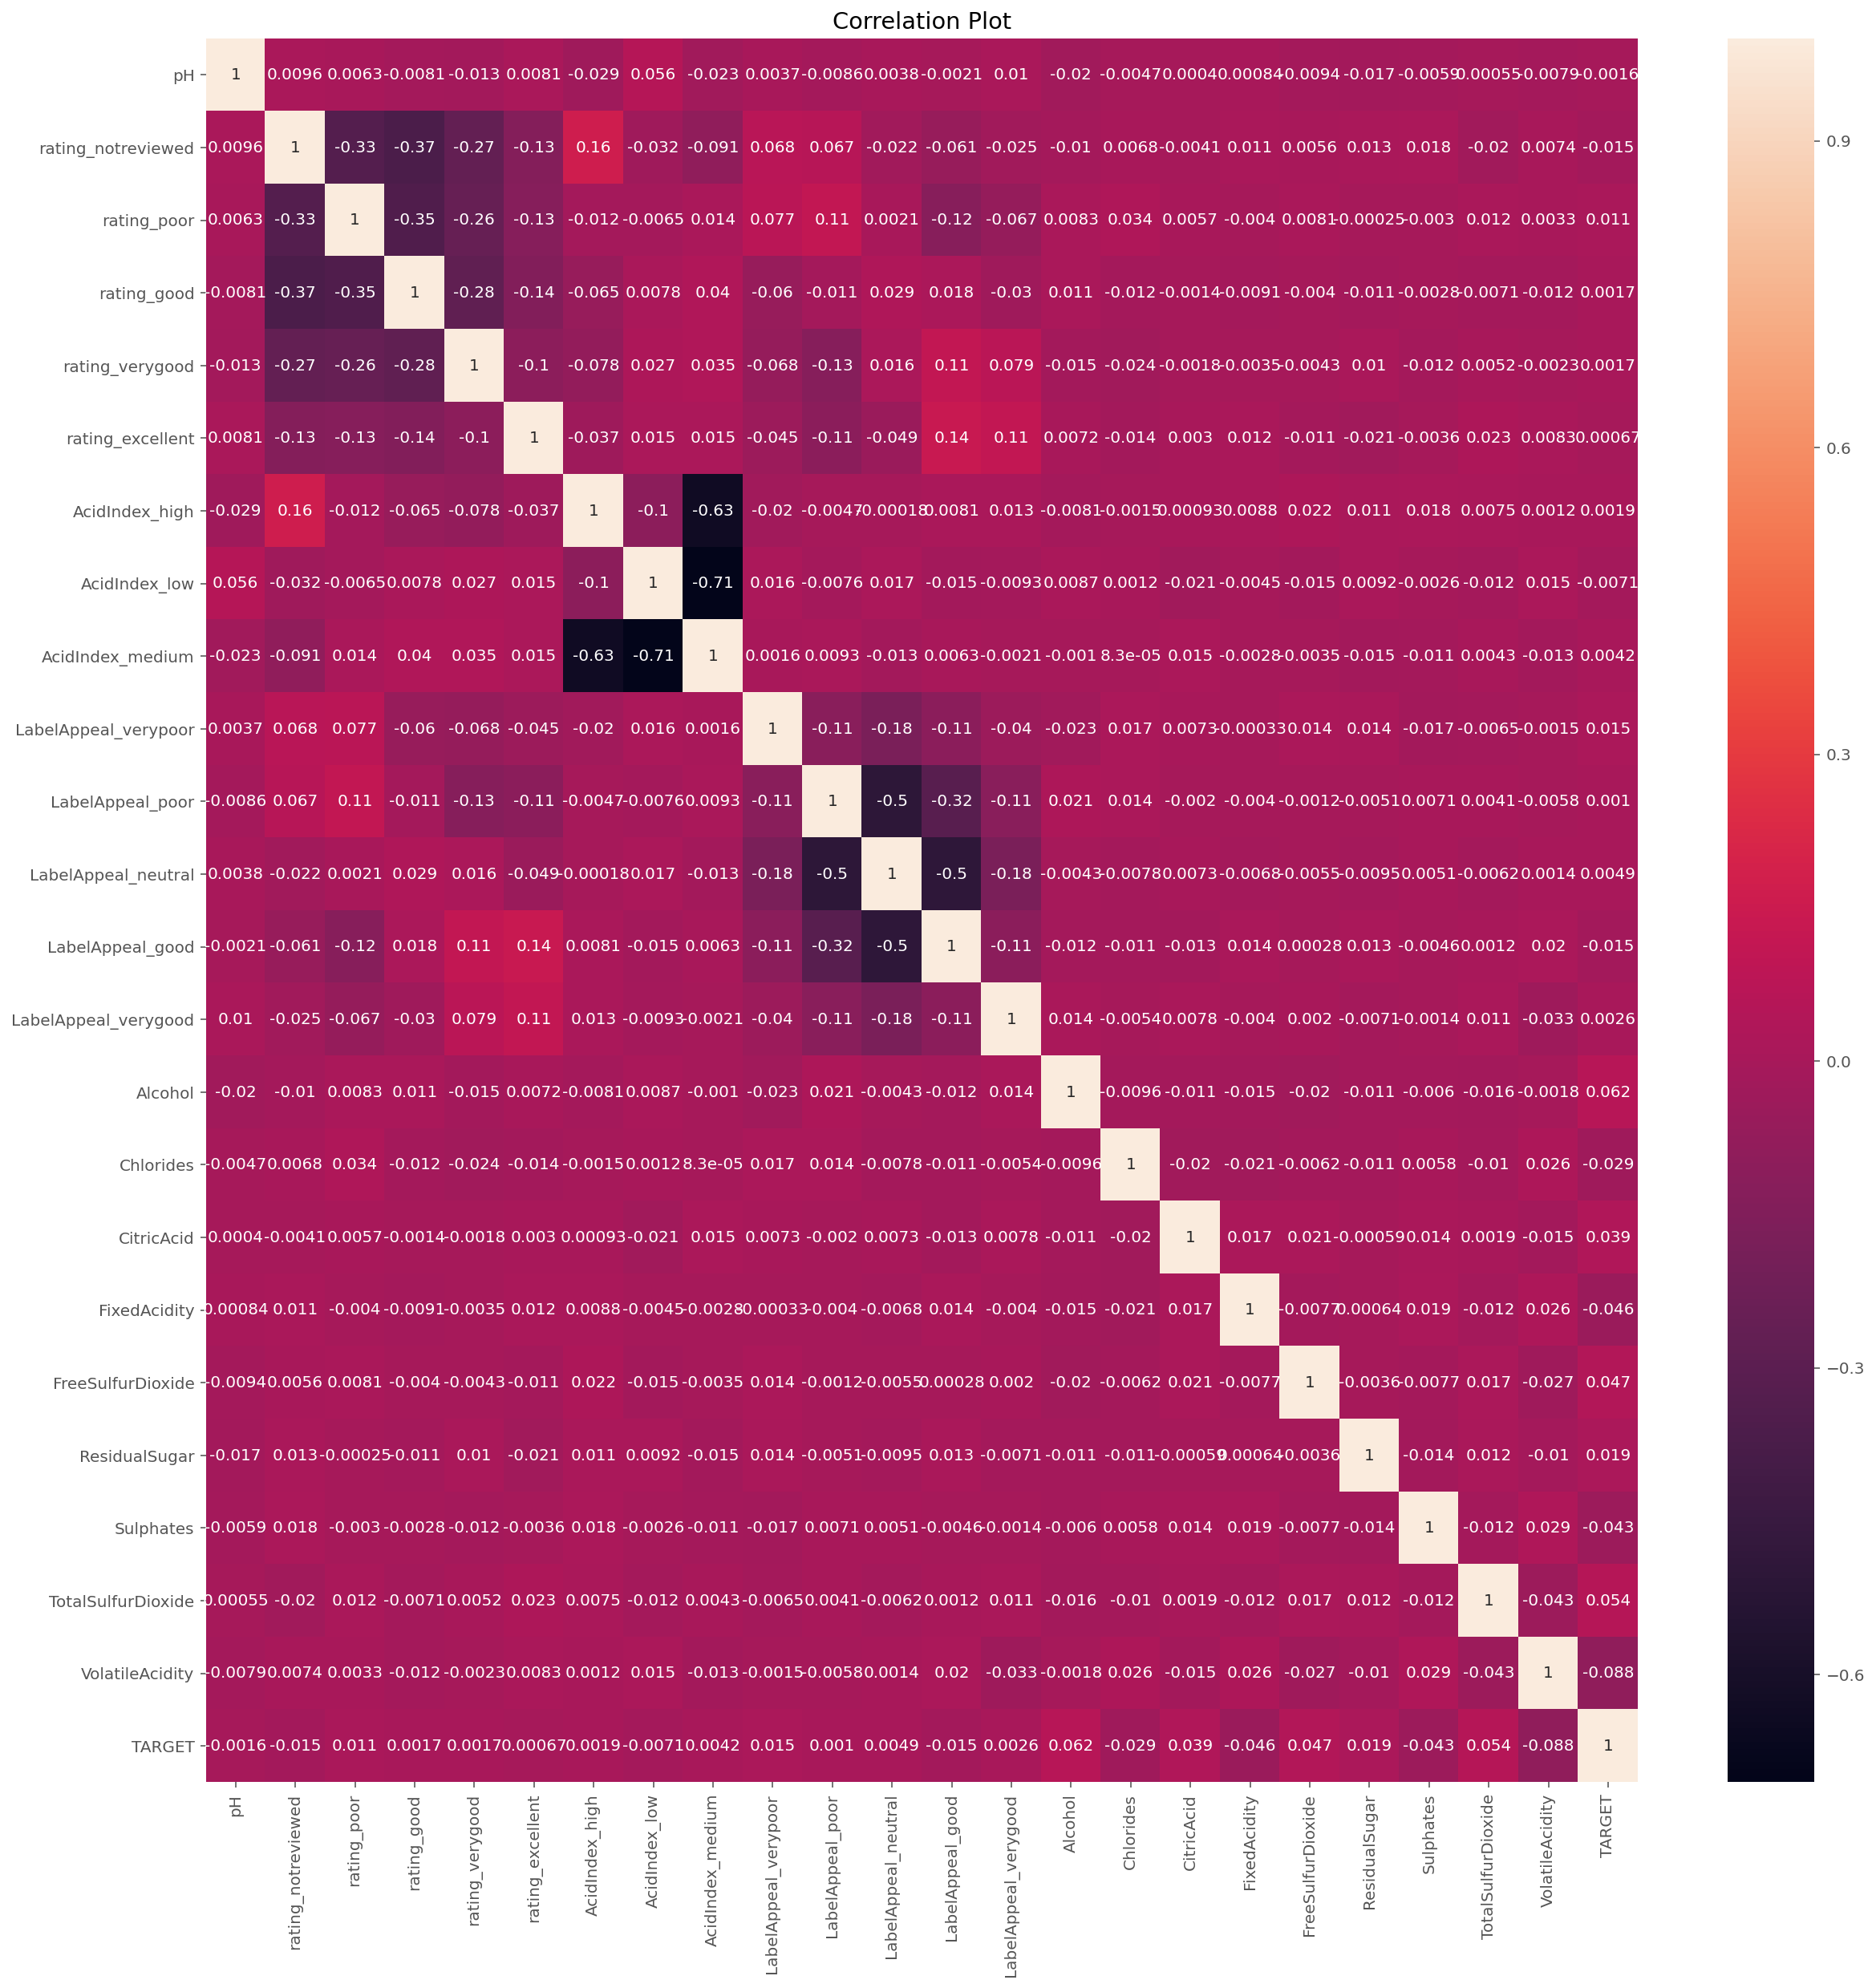

In [ ]:
#looking at the correlations after the cleaning
# initial correlation
cor = df_with_dummy.iloc[:,1:].corr()
plt.figure(figsize=(20,20))
plt.title("Correlation Plot")
sns.heatmap(cor,annot=True)
plt.show()

We can see that the numeric variables correlations are still low.

In [ ]:
#deleting the 2 lowest correlations
df_with_dummy.drop(columns=['pH','Density'], inplace=True)

### New Data distributed in histograms

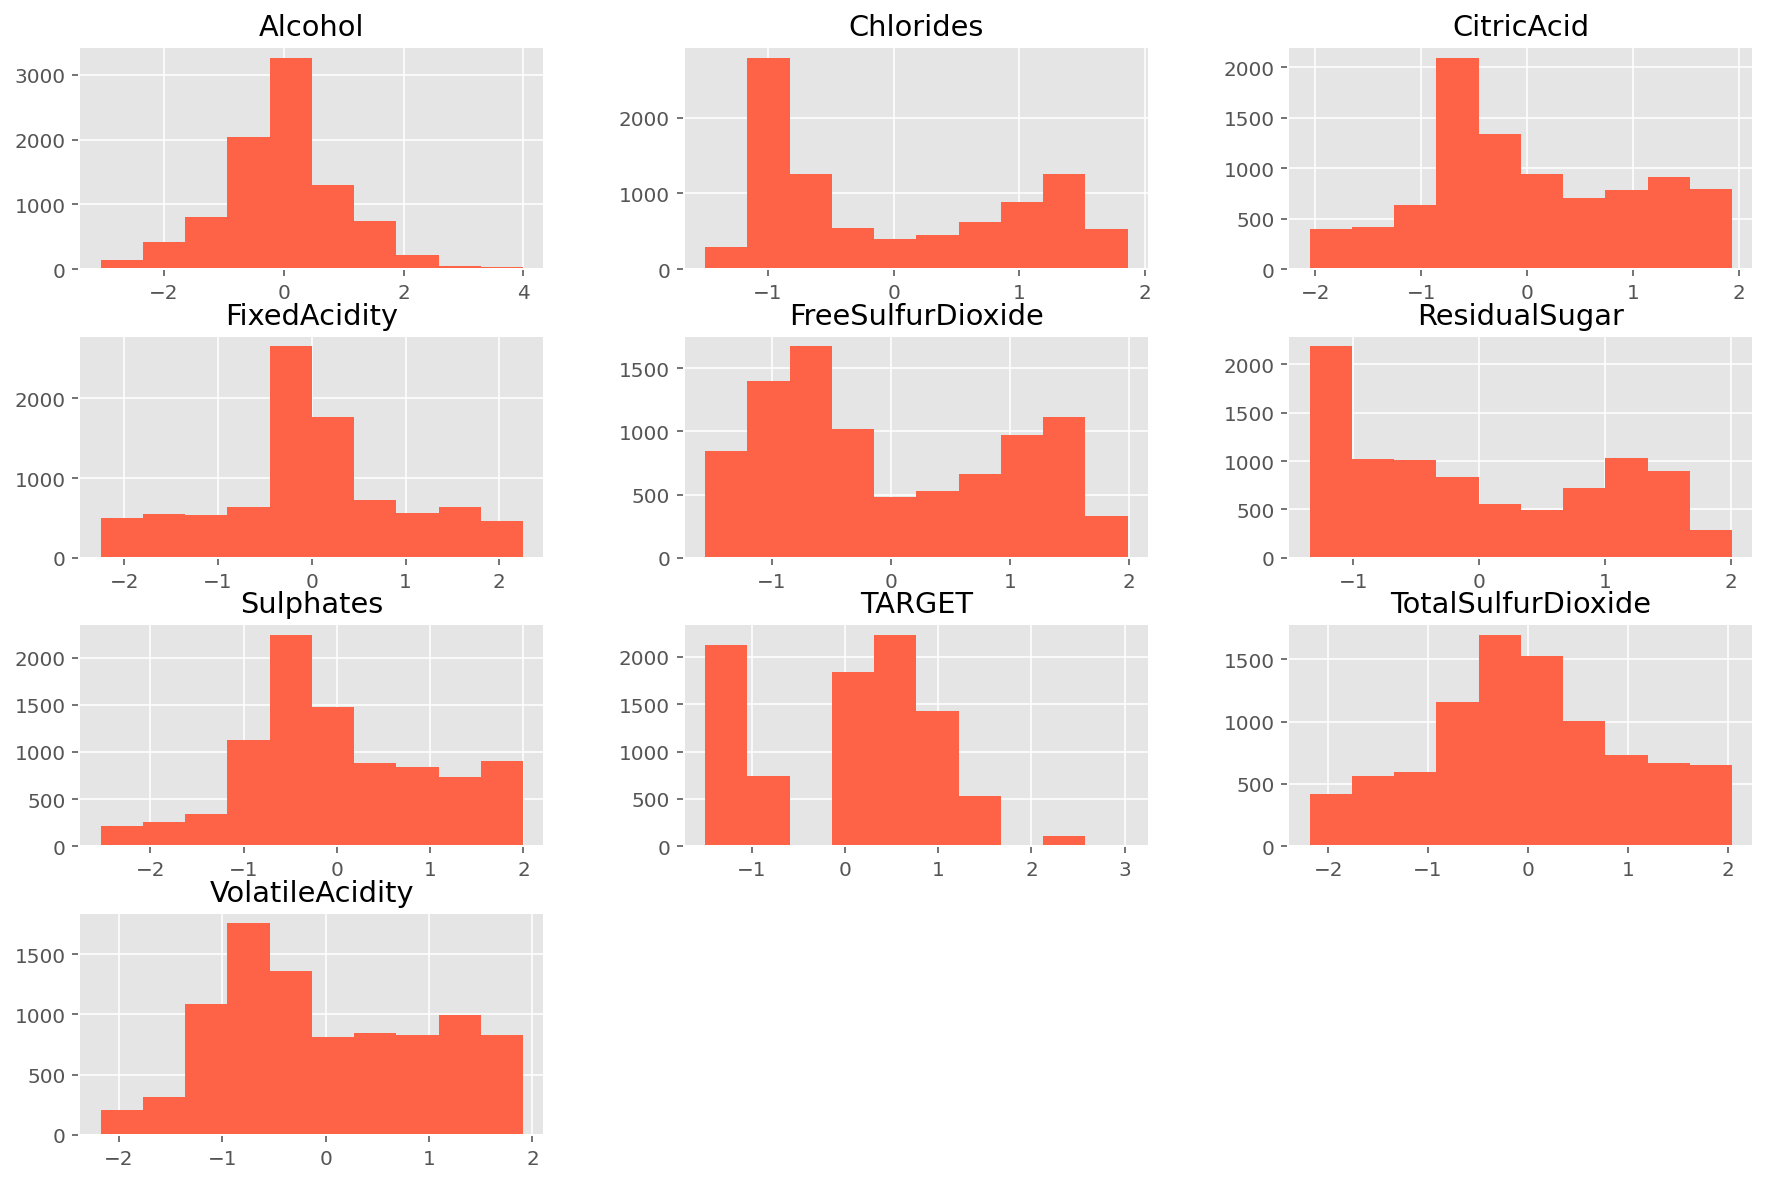

In [ ]:
df_with_dummy[columns].hist(figsize=(15,10), color='tomato');

### Old Data distributed in histograms

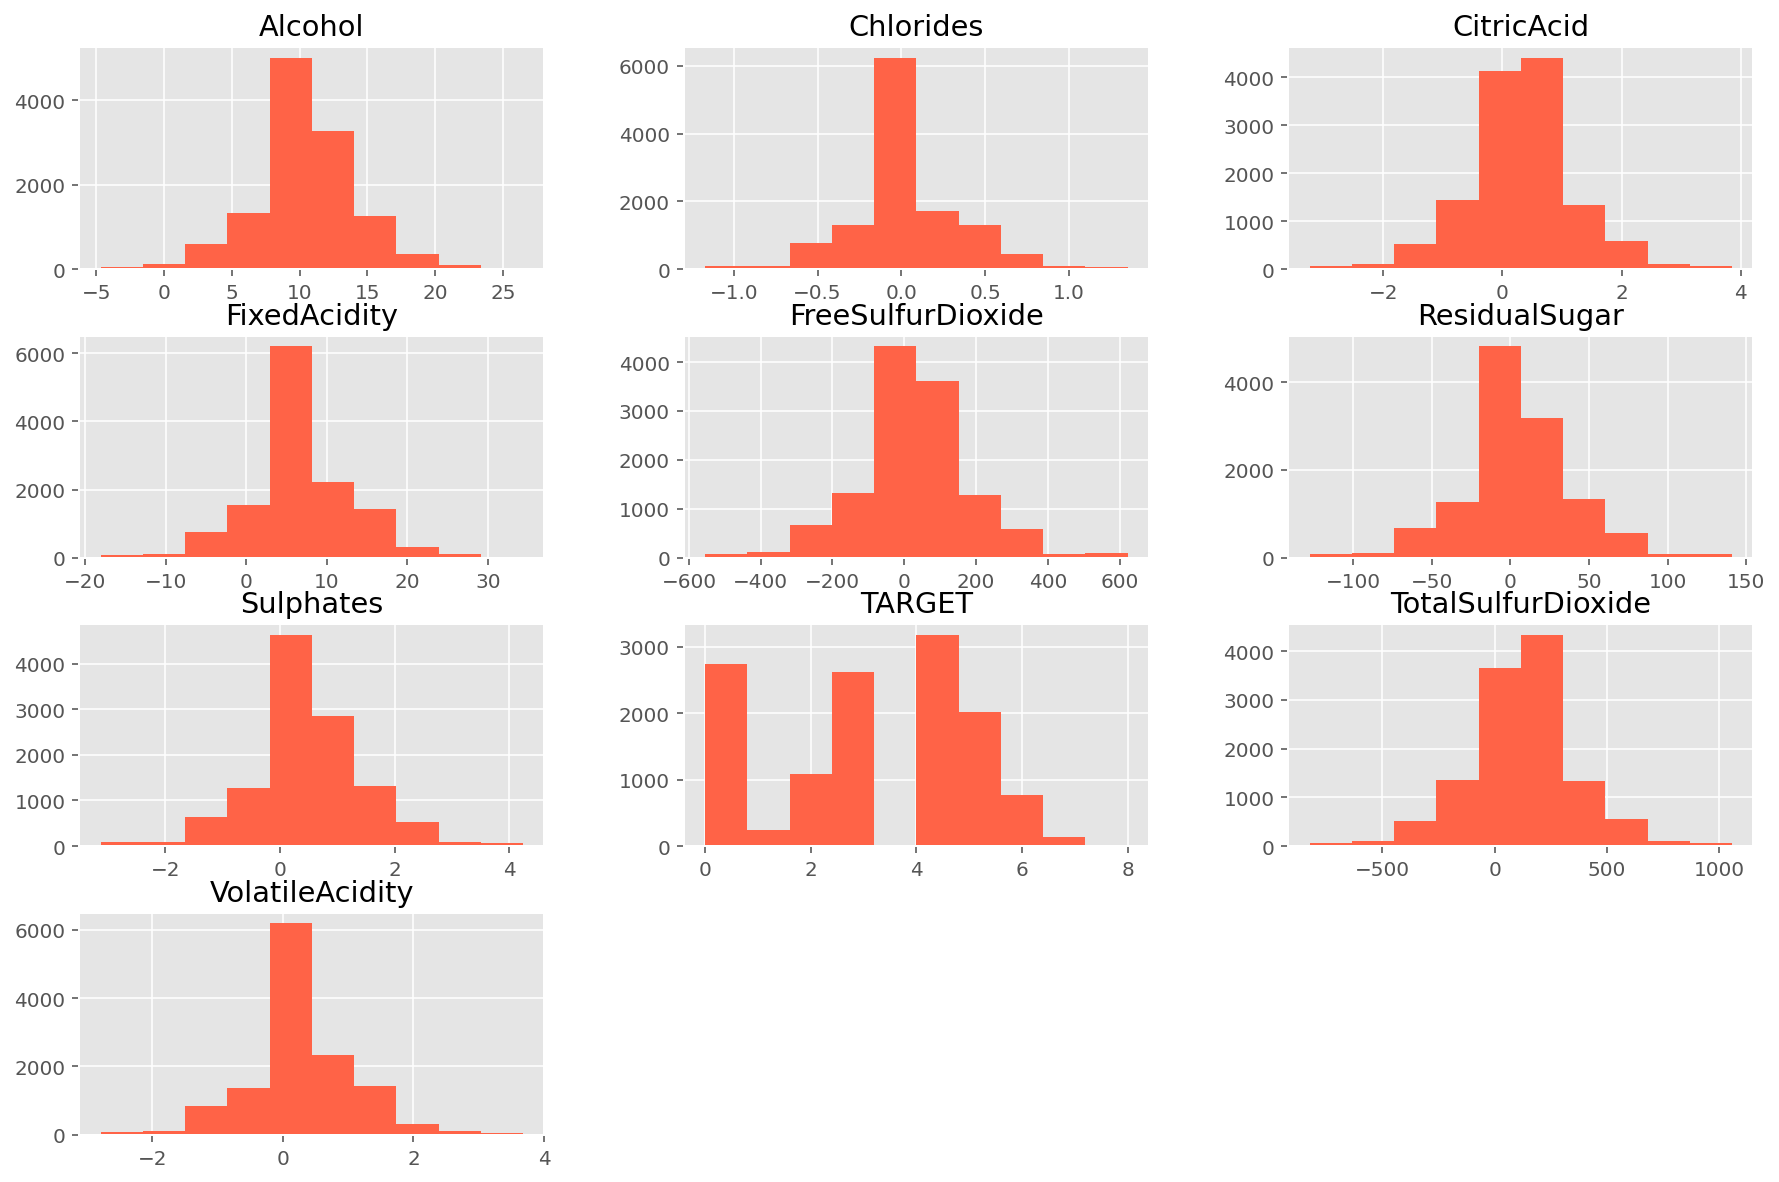

In [ ]:
df[columns].hist(figsize=(15,10), color='tomato');

Nulls from the numeric data were filled using back fill and forward fill which allowed us to maintain the PDF. Other methods we exploered such as mean, median, and mode we found altered the PDF in significant ways.

All of the numeric variables have been normalized through our min max scalar. We chose to use a range of 1-2 to avoid 0^x errors from the box-cox transformations.<br/>
All outliers, defined by either by domain knowledege from research or as 2.5 std from the mean of the data were removed. This reduces the bias that outliers can add to models.



In [ ]:
df_with_dummy[['rating_notreviewed', 'rating_poor', 'rating_good',
       'rating_verygood', 'rating_excellent', 'AcidIndex_high',
       'AcidIndex_low', 'AcidIndex_medium', 'LabelAppeal_verypoor',
       'LabelAppeal_poor', 'LabelAppeal_neutral', 'LabelAppeal_good',
       'LabelAppeal_verygood']].head()

,rating_notreviewed,rating_poor,rating_good,rating_verygood,rating_excellent,AcidIndex_high,AcidIndex_low,AcidIndex_medium,LabelAppeal_verypoor,LabelAppeal_poor,LabelAppeal_neutral,LabelAppeal_good,LabelAppeal_verygood
0,0,0,1,0,0,0,0,1,0,0,1,0,0
1,0,0,0,1,0,0,0,1,0,1,0,0,0
3,0,1,0,0,0,0,1,0,0,1,0,0,0
4,0,0,1,0,0,0,0,1,0,0,1,0,0
5,1,0,0,0,0,1,0,0,0,0,1,0,0


In [ ]:
#displaying rowcount between before and after data cleaning
df.shape[0]-df_with_dummy.shape[0]

2054

All our categorical data has been transformed into dummy variables.<br/>
The Stars attribute were treated as a separate class of data.<br/>
The AcidIndex attribute was binned into low, medium, and high due to sparse data in individual classes. We chose three groups based on our domain knowledge of the data.

We chose to remove 3 attributes from the data set.<br/>
The first was the Index. This was a unique identifier and would not have been predictive in model.
The second was the ph. This was removed because the correlation of ph and the response was extremely low. As well, we felt that since the relationship ph has with taste is affected by the amount of residual sugar it would have confused most models that could be used on it.
Density was also removed due to it's low correlation to the response variable.

# Conclusion

- Cleaning involved imputation and the removal of several columns which allowed to have a better understanding of the nature of the dataset. <br/>
- After applying normalization and Box-Cox transformation which provided us dataset that is within a specified range that is suitable to be fed into a machine learning model we observerved that the correlations remained very low to the response variable. <br>
- These modifications allowed us to replace missing null values to avoid deleting columns that had a power predictive value.
- Had we removed every observation that had missing (or negative) values we would have been left with just a few hundred rows of data.